In [5]:
from scipy import stats

In [23]:
# vectorize the delta instead of taking the mean

In [24]:
# matrix completion 
# https://cran.r-project.org/web/packages/eimpute/vignettes/eimpute.html
# https://cyrussamii.com/wp-content/uploads/2018/11/matrix-completion-3.html

In [355]:
# np.setdiff1d(_278, intersect_2012)
# intersect_2013 = np.intersect1d(unique_2013, highs)

In [333]:
a_2013_tilde_test = a_test.to_numpy() @ x_tilde
delta = a_2013_test - a_2013_tilde_test

In [336]:
delta.mean(axis=0).mean()

-0.0009411009979457455

In [24]:
# extract the low rank structure, look at singular values see if you see a cutoff threashod
u, s, v = np.linalg.svd(a)

n_component = find_top_components(s)

up = u[:, :n_component]
sp = s[:n_component]
vp = v[:n_component, :]

a_inv_tilde = (vp.T @ np.linalg.inv(np.diag(sp))) @ up.T

x_tilde = a_inv_tilde @ b.to_numpy()

b_2013_tilde = a_2013.to_numpy() @ x_tilde

delta = b_2013 - b_2013_tilde

fraction_lowered = delta / b_2013_tilde

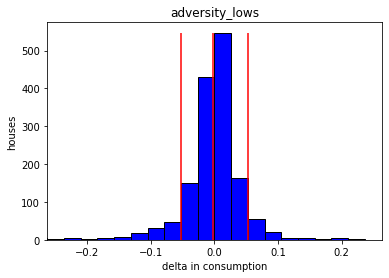

mean/max: -0.005
mean: -0.002
std: 0.053


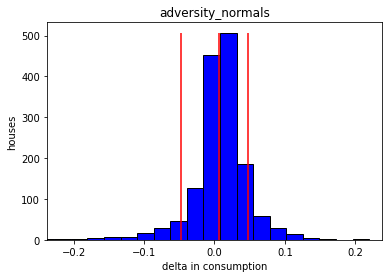

mean/max: 0.016
mean: 0.006
std: 0.048


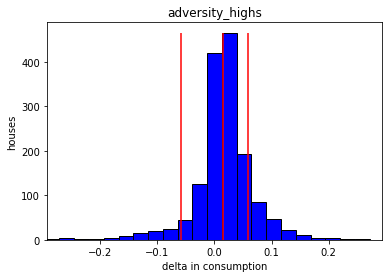

mean/max: 0.038
mean: 0.015
std: 0.059


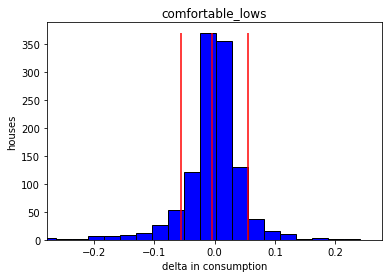

mean/max: -0.011
mean: -0.004
std: 0.055


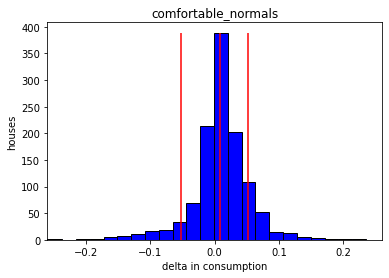

mean/max: 0.033
mean: 0.008
std: 0.052


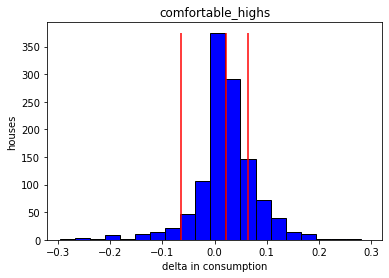

mean/max: 0.053
mean: 0.021
std: 0.064


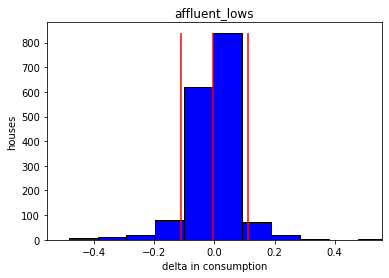

mean/max: -0.008
mean: -0.006
std: 0.111


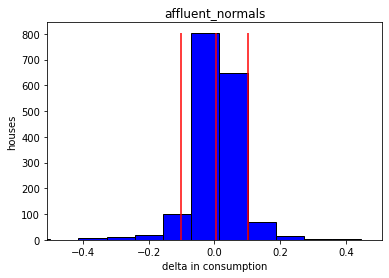

mean/max: 0.006
mean: 0.004
std: 0.102


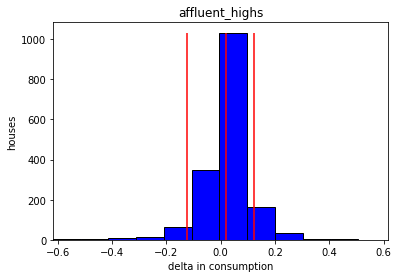

mean/max: 0.024
mean: 0.019
std: 0.123


In [306]:
stds_frac = []
means_frac = []

for s, title in zip([adversity_lows_mean_frac, adversity_normals_mean_frac, adversity_highs_mean_frac, 
                     comfortable_lows_mean_frac, comfortable_normals_mean_frac, comfortable_highs_mean_frac, 
                     affluent_lows_mean_frac, affluent_normals_mean_frac, affluent_highs_mean_frac], 
                    ['adversity_lows', 'adversity_normals', 'adversity_highs', 
                     'comfortable_lows', 'comfortable_normals', 'comfortable_highs', 
                     'affluent_lows', 'affluent_normals', 'affluent_highs']):

    y, x, _ = plt.hist(s, color = 'blue', edgecolor = 'black',
             bins = int(180/5))
    std = np.std(s)
    mean = np.mean(s)
    
    stds_frac.append(std)
    means_frac.append(mean)

    plt.vlines(x=mean, ymin=0, ymax=y.max(), colors='red')
    plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
    plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

    plt.xlim(-5*std, 5*std)

    plt.title(title)
    plt.xlabel('delta in consumption')
    plt.ylabel('houses')
    plt.show()
    
    print('mean/max:', round(mean / np.max(s), 3))
    print('mean:', round(mean, 3))
    print('std:', round(std, 3))

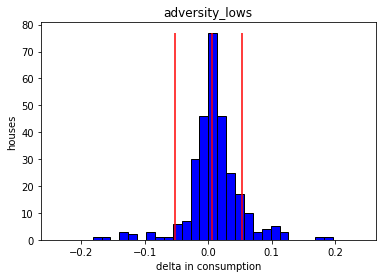

mean/max: 0.034
mean: 0.007
std: 0.053


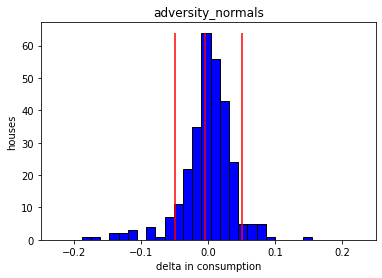

mean/max: -0.028
mean: -0.004
std: 0.05


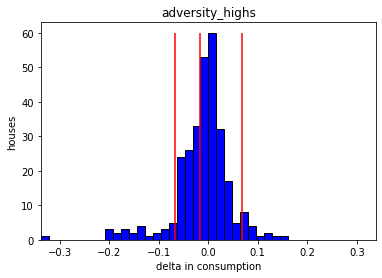

mean/max: -0.098
mean: -0.016
std: 0.068


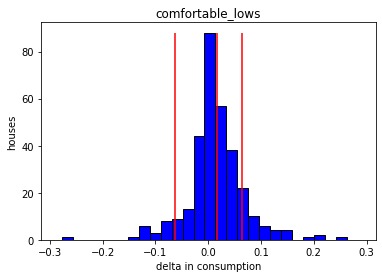

mean/max: 0.036
mean: 0.017
std: 0.063


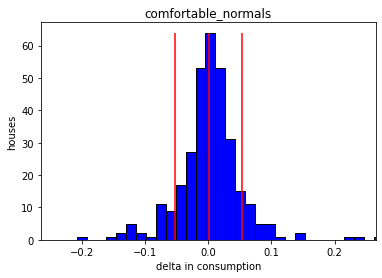

mean/max: 0.006
mean: 0.002
std: 0.053


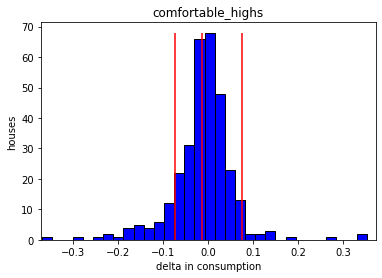

mean/max: -0.037
mean: -0.013
std: 0.074


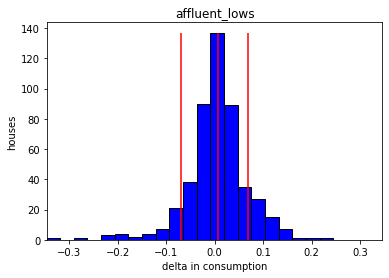

mean/max: 0.009
mean: 0.006
std: 0.069


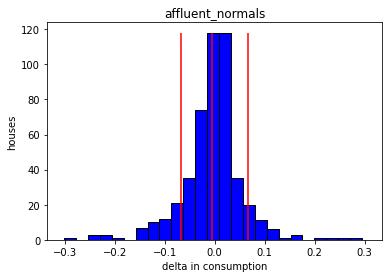

mean/max: -0.01
mean: -0.005
std: 0.067


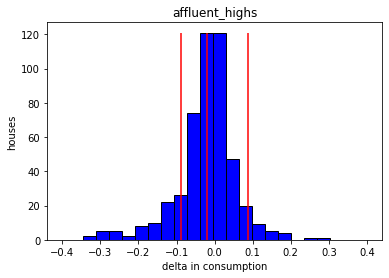

mean/max: -0.029
mean: -0.021
std: 0.088


In [287]:
means = []
stds = []

for s, title in zip([adversity_lows_mean, adversity_normals_mean, adversity_highs_mean, 
                     comfortable_lows_mean, comfortable_normals_mean, comfortable_highs_mean, 
                     affluent_lows_mean, affluent_normals_mean, affluent_highs_mean], 
                    ['adversity_lows', 'adversity_normals', 'adversity_highs', 
                     'comfortable_lows', 'comfortable_normals', 'comfortable_highs', 
                     'affluent_lows', 'affluent_normals', 'affluent_highs']):

    y, x, _ = plt.hist(s, color = 'blue', edgecolor = 'black',
             bins = int(180/5))
    std = np.std(s)
    mean = np.mean(s)
    
    stds.append(std)
    means.append(mean)

    # sns.distplot(delta_mean, hist=True, kde=False, 
    #              bins=int(180/5), color = 'blue',
    #              hist_kws={'edgecolor':'black'})

    plt.vlines(x=mean, ymin=0, ymax=y.max(), colors='red')
    plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
    plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

    plt.xlim(-5*std, 5*std)

    plt.title(title)
    plt.xlabel('delta in consumption')
    plt.ylabel('houses')
    plt.show()
    
    print('mean/max:', round(mean / np.max(s), 3))
    print('mean:', round(mean, 3))
    print('std:', round(std, 3))

In [301]:
means_frac

[-0.22418452942366307,
 0.6341610903623428,
 1.5388496608284048,
 -0.36283691835952964,
 0.7705594134011402,
 2.107517264639089,
 -0.6389093052504143,
 0.4306898596411395,
 1.911144713108031]

In [308]:
stds_frac = [element * 100 for element in stds_frac]
stds_frac

[5.261119771162158,
 4.759500199135316,
 5.859416609311766,
 5.548580889813012,
 5.205406627443445,
 6.423253135187674,
 11.138252472338309,
 10.151878358710324,
 12.317497009608493]

In [302]:
means_frac = [[-0.22418452942366307,
 0.6341610903623428,
 1.5388496608284048],
 [-0.36283691835952964,
 0.7705594134011402,
 2.107517264639089],
 [-0.6389093052504143,
 0.4306898596411395,
 1.911144713108031]]

In [300]:
stds_frac = [[5.261119771162158,
 4.759500199135316,
 5.859416609311766],
 [5.548580889813012,
 5.205406627443445,
 6.423253135187674],
 [11.138252472338309,
 10.151878358710324,
 12.317497009608493]]

In [303]:
mean_frac = pd.DataFrame(means_frac, index=['low', 'normal', 'high'], 
                    columns=['adversity', 'comfortable', 'affluent'])

std_frac = pd.DataFrame(stds_frac, index=['low', 'normal', 'high'], 
                   columns=['adversity', 'comfortable', 'affluent'])

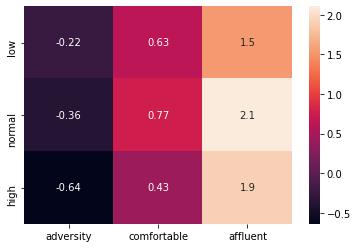

In [304]:
sns.heatmap(mean_frac, annot=True);

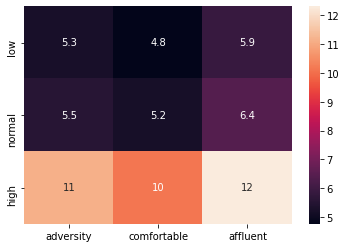

In [305]:
sns.heatmap(std_frac, annot=True);

In [296]:
# mean_over_max = pd.DataFrame(index=['low', 'normal', 'high'], 
#                              columns=['adversity', 'comfortable', 'affluent'])

mean = pd.DataFrame(means, index=['low', 'normal', 'high'], 
                    columns=['adversity', 'comfortable', 'affluent'])

std = pd.DataFrame(stds, index=['low', 'normal', 'high'], 
                   columns=['adversity', 'comfortable', 'affluent'])

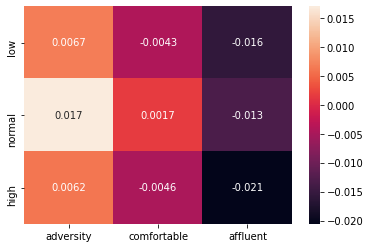

In [297]:
sns.heatmap(mean, annot=True);

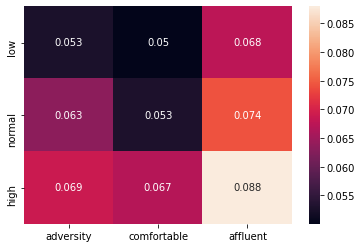

In [298]:
sns.heatmap(std, annot=True);

In [284]:
adversity_lows_frac = fraction_lowered.loc[fraction_lowered.index.isin(lows), fraction_lowered.columns.isin(adversity)]
adversity_normals_frac = fraction_lowered.loc[fraction_lowered.index.isin(normals), fraction_lowered.columns.isin(adversity)]
adversity_highs_frac = fraction_lowered.loc[fraction_lowered.index.isin(highs), fraction_lowered.columns.isin(adversity)]

comfortable_lows_frac = fraction_lowered.loc[fraction_lowered.index.isin(lows), fraction_lowered.columns.isin(comfortable)]
comfortable_normals_frac = fraction_lowered.loc[fraction_lowered.index.isin(normals), fraction_lowered.columns.isin(comfortable)]
comfortable_highs_frac = fraction_lowered.loc[fraction_lowered.index.isin(highs), fraction_lowered.columns.isin(comfortable)]

affluent_lows_frac = fraction_lowered.loc[fraction_lowered.index.isin(lows), fraction_lowered.columns.isin(affluent)]
affluent_normals_frac = fraction_lowered.loc[fraction_lowered.index.isin(normals), fraction_lowered.columns.isin(affluent)]
affluent_highs_frac = fraction_lowered.loc[fraction_lowered.index.isin(highs), fraction_lowered.columns.isin(affluent)]


adversity_lows_mean_frac = adversity_lows.mean(axis=0)
adversity_normals_mean_frac = adversity_normals.mean(axis=0)
adversity_highs_mean_frac = adversity_highs.mean(axis=0)

comfortable_lows_mean_frac = comfortable_lows.mean(axis=0)
comfortable_normals_mean_frac = comfortable_normals.mean(axis=0)
comfortable_highs_mean_frac = comfortable_highs.mean(axis=0)

affluent_lows_mean_frac = affluent_lows.mean(axis=0)
affluent_normals_mean_frac = affluent_normals.mean(axis=0)
affluent_highs_mean_frac = affluent_highs.mean(axis=0)

In [285]:
adversity_lows = delta.loc[delta.index.isin(lows), delta.columns.isin(adversity)]
adversity_normals = delta.loc[delta.index.isin(normals), delta.columns.isin(adversity)]
adversity_highs = delta.loc[delta.index.isin(highs), delta.columns.isin(adversity)]

comfortable_lows = delta.loc[delta.index.isin(lows), delta.columns.isin(comfortable)]
comfortable_normals = delta.loc[delta.index.isin(normals), delta.columns.isin(comfortable)]
comfortable_highs = delta.loc[delta.index.isin(highs), delta.columns.isin(comfortable)]

affluent_lows = delta.loc[delta.index.isin(lows), delta.columns.isin(affluent)]
affluent_normals = delta.loc[delta.index.isin(normals), delta.columns.isin(affluent)]
affluent_highs = delta.loc[delta.index.isin(highs), delta.columns.isin(affluent)]


adversity_lows_mean = adversity_lows.mean(axis=0)
adversity_normals_mean = adversity_normals.mean(axis=0)
adversity_highs_mean = adversity_highs.mean(axis=0)

comfortable_lows_mean = comfortable_lows.mean(axis=0)
comfortable_normals_mean = comfortable_normals.mean(axis=0)
comfortable_highs_mean = comfortable_highs.mean(axis=0)

affluent_lows_mean = affluent_lows.mean(axis=0)
affluent_normals_mean = affluent_normals.mean(axis=0)
affluent_highs_mean = affluent_highs.mean(axis=0)

In [214]:
adversity = total_acorn['house_id'].loc[total_acorn['acorn_category'] == 'Adversity'].to_numpy()
comfortable = total_acorn['house_id'].loc[total_acorn['acorn_category'] == 'Comfortable'].to_numpy()
affluent = total_acorn['house_id'].loc[total_acorn['acorn_category'] == 'Affluent'].to_numpy()

In [162]:
print('mean/max:', round(np.mean(affluent_highs_mean) / np.max(affluent_highs_mean), 3))
print('mean:', round(np.mean(affluent_highs_mean), 3))
print('std:', round(np.std(affluent_highs_mean), 3))

mean/max: 0.024
mean: 0.019
std: 0.123


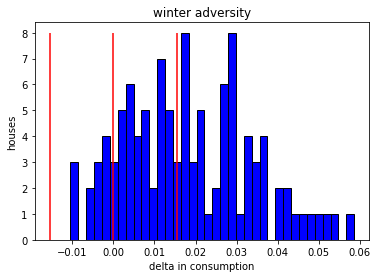

In [503]:
y, x, _ = plt.hist(delta_mean, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
std = np.std(delta_mean)

# sns.distplot(delta_mean, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

plt.vlines(x=0, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

plt.title('winter adversity')
plt.xlabel('delta in consumption')
plt.ylabel('houses')
plt.show()

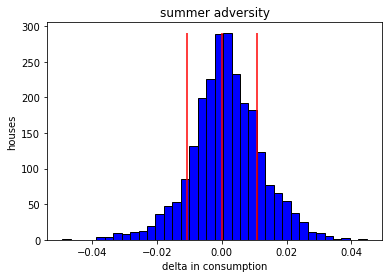

In [471]:
y, x, _ = plt.hist(delta_mean, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
std = np.std(delta_mean)

# sns.distplot(delta_mean, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

plt.vlines(x=0, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

plt.title('summer adversity')
plt.xlabel('delta in consumption')
plt.ylabel('houses')
plt.show()

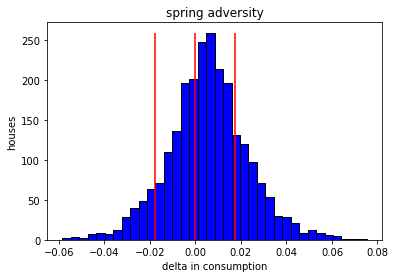

In [460]:
y, x, _ = plt.hist(delta_mean, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
std = np.std(delta_mean)

# sns.distplot(delta_mean, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

plt.vlines(x=0, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

plt.title('spring adversity')
plt.xlabel('delta in consumption')
plt.ylabel('houses')
plt.show()

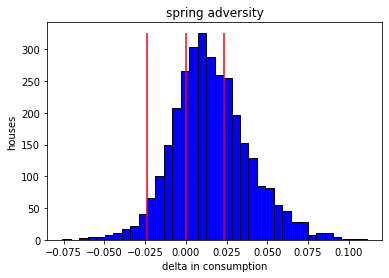

In [191]:
import seaborn as sns

# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

y, x, _ = plt.hist(delta_mean, color = 'blue', edgecolor = 'black',
         bins = int(180/5))
std = np.std(delta_mean)

# sns.distplot(delta_mean, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

plt.vlines(x=0, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=std, ymin=0, ymax=y.max(), colors='red')
plt.vlines(x=-std, ymin=0, ymax=y.max(), colors='red')

plt.title('spring adversity')
plt.xlabel('delta in consumption')
plt.ylabel('houses')
plt.show()

In [163]:
print(a.shape)
print(u.shape)
print(s.shape)
print(v.shape)

print(up.shape)
print(sp.shape)
print(vp.shape)

(156, 321)
(156, 156)
(156,)
(321, 321)


In [180]:
(up @ np.diag(sp)) @ vp

array([[ 0.62725365,  0.06783358,  0.29006056, ..., -0.02371123,
         0.0076821 , -0.01671498],
       [ 0.67873577,  0.04859879,  0.26505758, ..., -0.02024574,
        -0.00470862, -0.01078925],
       [ 0.57866021,  0.05644468,  0.21692627, ...,  0.02541522,
        -0.01978148, -0.01460496],
       ...,
       [ 0.06040713,  0.07533671,  0.09128996, ...,  0.10470523,
         0.17483547,  0.20854701],
       [ 0.18472539,  0.05734201,  0.112174  , ...,  0.07465086,
         0.21296265,  0.24405049],
       [ 0.24365405,  0.06935499,  0.17919278, ...,  0.08933938,
         0.37350695,  0.13369561]])

In [169]:
(np.linalg.inv(v) @ np.linalg.inv(np.diag(s))) @ np.linalg.inv(u)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 156 is different from 321)

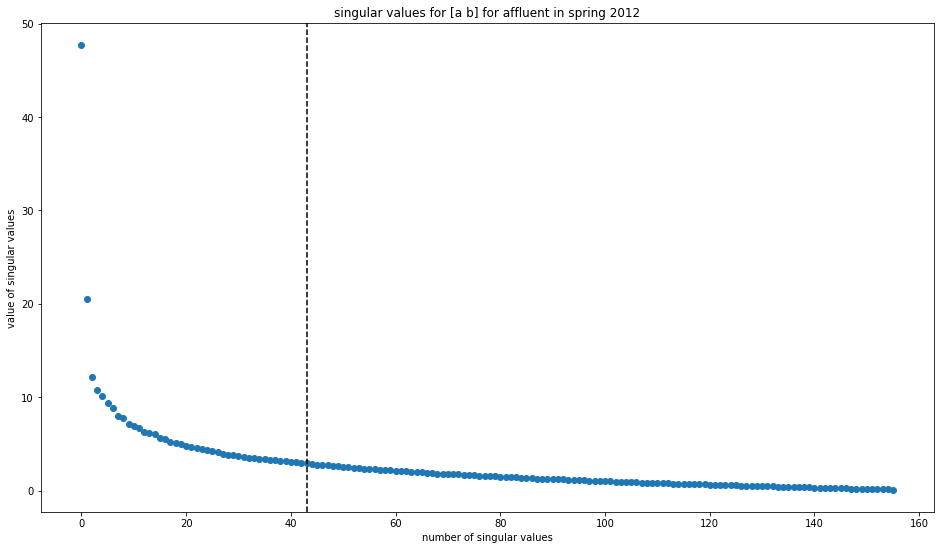

In [127]:
plt.figure(figsize=(16, 9))
plt.scatter(list(range(len(s))), s)
plt.axvline(x=43, color='k', linestyle='--')
plt.title('singular values for [a b] for affluent in spring 2012')
plt.xlabel("number of singular values")
plt.ylabel("value of singular values")
plt.show()

In [12]:
# taking out datapoints that don't have a correct acorn category
total_acorn = total_acorn.loc[(total_acorn['acorn_category'] != 'ACORN-U') & 
                              (total_acorn['acorn_category'] != 'ACORN-')]

In [13]:
acorn_2012 = pd.merge(total_usage_2012, total_acorn, how='inner', on='house_id')

affluent_2012 = acorn_2012.loc[acorn_2012['acorn_category'] == 'Affluent'].reset_index(drop=True)
adversity_2012 = acorn_2012.loc[acorn_2012['acorn_category'] == 'Adversity'].reset_index(drop=True)
comfortable_2012 = acorn_2012.loc[acorn_2012['acorn_category'] == 'Comfortable'].reset_index(drop=True)

affluent_2012.reset_index(drop=True, inplace=True)
adversity_2012.reset_index(drop=True, inplace=True)
comfortable_2012.reset_index(drop=True, inplace=True)

In [14]:
acorn_2013 = pd.merge(total_usage_2013, total_acorn, how='inner', on='house_id')

affluent_2013 = acorn_2013.loc[acorn_2013['acorn_category'] == 'Affluent'].reset_index(drop=True)
adversity_2013 = acorn_2013.loc[acorn_2013['acorn_category'] == 'Adversity'].reset_index(drop=True)
comfortable_2013 = acorn_2013.loc[acorn_2013['acorn_category'] == 'Comfortable'].reset_index(drop=True)

affluent_2013.reset_index(drop=True, inplace=True)
adversity_2013.reset_index(drop=True, inplace=True)
comfortable_2013.reset_index(drop=True, inplace=True)

In [16]:
def household_mean_daily_consumption(df):
    df = df.groupby([df['date_time'].dt.normalize(), df['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/D'})
    df['treated'] = df['treated'].astype('bool')
    df = df.groupby([df.index.get_level_values(0),'treated']).mean()
    return df['KWH/D'].unstack()

In [17]:
def slice_data(df, m, weekend=False):
    return df.loc[((df['month'] == m[0]) |
                   (df['month'] == m[1]) |
                   (df['month'] == m[2])) &
                  ((df['day_of_week'] != 5) &
                   (df['day_of_week'] != 6))
                 ].reset_index(drop=True)

In [18]:
# returns the hourly sum of the treated and untreated groups over all households
def hourly_sum(df):
    df = df.groupby(['treated', 'date_time']).sum(['KWH/hh'])['KWH/hh']
#     df = df.groupby(['treated', 'date_time']).sum(['KWH/hh'])['KWH/hh'] / df['house_id'].nunique()
    return df.unstack('treated')

In [19]:
# returns the daily sum of the treated and untreated groups over all households and all hours of the day
def daily_sum(df):
    return df.groupby([df.index.to_series().dt.normalize()]).sum()

In [20]:
from sklearn.linear_model import LinearRegression

def linear_regression(df_2012, df_2013, title2):
    X_2012 = df_2012[True].values.reshape(-1, 1)
    Y_2012 = df_2012[False].values.reshape(-1, 1)
    X_2013 = df_2013[True].values.reshape(-1, 1)
    Y_2013 = df_2013[False].values.reshape(-1, 1)
    
    linear_regressor_2012 = LinearRegression()  # create object for the class
    linear_regressor_2012.fit(X_2012, Y_2012)  # perform linear regression
    Y_pred_2012 = linear_regressor_2012.predict(X_2012)  # make predictions
    
#     linear_regressor_2013 = LinearRegression()  # create object for the class
#     linear_regressor_2013.fit(X_2013, Y_2013)  # perform linear regression
    Y_pred_2013 = linear_regressor_2012.predict(X_2013)  # make predictions
#     Y_pred_2013_other = linear_regressor_2013.predict(X_2013)  # make predictions
    
#     plt.figure(figsize=(16, 9))
    
# #     plt.subplot(211)
# #     plt.scatter(X_2012, Y_2012, marker='.')
# #     plt.plot(X_2012, Y_pred_2012, color='red')
# #     plt.title(title1)
    
# #     plt.subplot(212)
# #     plt.scatter(X_2013, Y_2013, marker='.')
# #     plt.plot(X_2013, Y_pred_2013, color='red')
# #     plt.title(title2)
    
#     plt.scatter(X_2012, Y_2012, marker='.', color='orange')
#     plt.plot(X_2012, Y_pred_2012, color='red')
#     plt.scatter(X_2013, Y_2013, marker='.', color='green')
#     plt.plot(X_2013, Y_pred_2013, color='blue')
#     plt.title(title2)
    
#     plt.xlabel("treatment data")
#     plt.ylabel("control data")
#     plt.show()
    
    return Y_pred_2012, Y_pred_2013

In [34]:
spring_adversity_2012 = slice_data(adversity_2012, [3, 4, 5])
spring_adversity_2013 = slice_data(adversity_2013, [3, 4, 5])

spring_adversity_2012 = spring_adversity_2012.loc[spring_adversity_2012['date_time'].isin(highs_2012)]
spring_adversity_2013 = spring_adversity_2013.loc[spring_adversity_2013['date_time'].isin(highs)]

# spring_adversity_2012_hourly_sum = hourly_sum(spring_adversity_2012)
# spring_adversity_2013_hourly_sum = hourly_sum(spring_adversity_2013)

summer_adversity_2012 = slice_data(adversity_2012, [6, 7, 8])
summer_adversity_2013 = slice_data(adversity_2013, [6, 7, 8])

summer_adversity_2012 = summer_adversity_2012.loc[summer_adversity_2012['date_time'].isin(highs_2012)]
summer_adversity_2013 = summer_adversity_2013.loc[summer_adversity_2013['date_time'].isin(highs)]

# summer_adversity_2012_hourly_sum = hourly_sum(summer_adversity_2012)
# summer_adversity_2013_hourly_sum = hourly_sum(summer_adversity_2013)

fall_adversity_2012 = slice_data(adversity_2012, [9, 10, 11])
fall_adversity_2013 = slice_data(adversity_2013, [9, 10, 11])

fall_adversity_2012 = fall_adversity_2012.loc[fall_adversity_2012['date_time'].isin(highs_2012)]
fall_adversity_2013 = fall_adversity_2013.loc[fall_adversity_2013['date_time'].isin(highs)]

# fall_adversity_2012_hourly_sum = hourly_sum(fall_adversity_2012)
# fall_adversity_2013_hourly_sum = hourly_sum(fall_adversity_2013)

winter_adversity_2012 = slice_data(adversity_2012, [12, 1, 2])
winter_adversity_2013 = slice_data(adversity_2013, [12, 1, 2])

winter_adversity_2012 = winter_adversity_2012.loc[winter_adversity_2012['date_time'].isin(highs_2012)]
winter_adversity_2013 = winter_adversity_2013.loc[winter_adversity_2013['date_time'].isin(highs)]

# winter_adversity_2012_hourly_sum = hourly_sum(winter_adversity_2012)
# winter_adversity_2013_hourly_sum = hourly_sum(winter_adversity_2013)

In [15]:
# round(0.009 / fall_affluent_2013_hourly_sum['rescale'].mean() * 100, 1)

NameError: name 'fall_affluent_2013_hourly_sum' is not defined

In [35]:
spring_comfortable_2012 = slice_data(comfortable_2012, [3, 4, 5])
spring_comfortable_2013 = slice_data(comfortable_2013, [3, 4, 5])

# spring_comfortable_2012 = spring_comfortable_2012.loc[spring_comfortable_2012['date_time'].isin(highs_2012)]
# spring_comfortable_2013 = spring_comfortable_2013.loc[spring_comfortable_2013['date_time'].isin(highs)]

# spring_comfortable_2012_hourly_sum = hourly_sum(spring_comfortable_2012)
# spring_comfortable_2013_hourly_sum = hourly_sum(spring_comfortable_2013)

summer_comfortable_2012 = slice_data(comfortable_2012, [6, 7, 8])
summer_comfortable_2013 = slice_data(comfortable_2013, [6, 7, 8])

# summer_comfortable_2012 = summer_comfortable_2012.loc[summer_comfortable_2012['date_time'].isin(highs_2012)]
# summer_comfortable_2013 = summer_comfortable_2013.loc[summer_comfortable_2013['date_time'].isin(highs)]

# summer_comfortable_2012_hourly_sum = hourly_sum(summer_comfortable_2012)
# summer_comfortable_2013_hourly_sum = hourly_sum(summer_comfortable_2013)

fall_comfortable_2012 = slice_data(comfortable_2012, [9, 10, 11])
fall_comfortable_2013 = slice_data(comfortable_2013, [9, 10, 11])

# fall_comfortable_2012 = fall_comfortable_2012.loc[fall_comfortable_2012['date_time'].isin(highs_2012)]
# fall_comfortable_2013 = fall_comfortable_2013.loc[fall_comfortable_2013['date_time'].isin(highs)]

# fall_comfortable_2012_hourly_sum = hourly_sum(fall_comfortable_2012)
# fall_comfortable_2013_hourly_sum = hourly_sum(fall_comfortable_2013)

winter_comfortable_2012 = slice_data(comfortable_2012, [12, 1, 2])
winter_comfortable_2013 = slice_data(comfortable_2013, [12, 1, 2])

# winter_comfortable_2012 = winter_comfortable_2012.loc[winter_comfortable_2012['date_time'].isin(highs_2012)]
# winter_comfortable_2013 = winter_comfortable_2013.loc[winter_comfortable_2013['date_time'].isin(highs)]

# winter_comfortable_2012_hourly_sum = hourly_sum(winter_comfortable_2012)
# winter_comfortable_2013_hourly_sum = hourly_sum(winter_comfortable_2013)

In [100]:
spring_affluent_2012 = slice_data(affluent_2012, [3, 4, 5])
spring_affluent_2013 = slice_data(affluent_2013, [3, 4, 5])

spring_affluent_2012 = spring_affluent_2012.loc[spring_affluent_2012['date_time'].isin(highs_2012)]
spring_affluent_2013 = spring_affluent_2013.loc[spring_affluent_2013['date_time'].isin(highs)]

In [36]:
spring_affluent_2012 = slice_data(affluent_2012, [3, 4, 5])
spring_affluent_2013 = slice_data(affluent_2013, [3, 4, 5])

spring_affluent_2012 = spring_affluent_2012.loc[spring_affluent_2012['date_time'].isin(highs_2012)]
spring_affluent_2013 = spring_affluent_2013.loc[spring_affluent_2013['date_time'].isin(highs)]

# spring_affluent_2012_hourly_sum = hourly_sum(spring_affluent_2012)
# spring_affluent_2013_hourly_sum = hourly_sum(spring_affluent_2013)

summer_affluent_2012 = slice_data(affluent_2012, [6, 7, 8])
summer_affluent_2013 = slice_data(affluent_2013, [6, 7, 8])

summer_affluent_2012 = summer_affluent_2012.loc[summer_affluent_2012['date_time'].isin(highs_2012)]
summer_affluent_2013 = summer_affluent_2013.loc[summer_affluent_2013['date_time'].isin(highs)]

# summer_affluent_2012_hourly_sum = hourly_sum(summer_affluent_2012)
# summer_affluent_2013_hourly_sum = hourly_sum(summer_affluent_2013)

fall_affluent_2012 = slice_data(affluent_2012, [9, 10, 11])
fall_affluent_2013 = slice_data(affluent_2013, [9, 10, 11])

fall_affluent_2012 = fall_affluent_2012.loc[fall_affluent_2012['date_time'].isin(highs_2012)]
fall_affluent_2013 = fall_affluent_2013.loc[fall_affluent_2013['date_time'].isin(highs)]

# fall_affluent_2012_hourly_sum = hourly_sum(fall_affluent_2012)
# fall_affluent_2013_hourly_sum = hourly_sum(fall_affluent_2013)

winter_affluent_2012 = slice_data(affluent_2012, [12, 1, 2])
winter_affluent_2013 = slice_data(affluent_2013, [12, 1, 2])

winter_affluent_2012 = winter_affluent_2012.loc[winter_affluent_2012['date_time'].isin(highs_2012)]
winter_affluent_2013 = winter_affluent_2013.loc[winter_affluent_2013['date_time'].isin(highs)]

# winter_affluent_2012_hourly_sum = hourly_sum(winter_affluent_2012)
# winter_affluent_2013_hourly_sum = hourly_sum(winter_affluent_2013)

In [22]:
spring_adversity_y_2012, spring_adversity_y_2013 = linear_regression(spring_adversity_2012_hourly_sum, 
                                                                     spring_adversity_2013_hourly_sum, 'summer adversity')
spring_adversity_2012_hourly_sum['rescale'] = spring_adversity_y_2012.reshape(1, -1)[0]
spring_adversity_2013_hourly_sum['rescale'] = spring_adversity_y_2013.reshape(1, -1)[0]

summer_adversity_y_2012, summer_adversity_y_2013 = linear_regression(summer_adversity_2012_hourly_sum, 
                                                                     summer_adversity_2013_hourly_sum, 'summer adversity')
summer_adversity_2012_hourly_sum['rescale'] = summer_adversity_y_2012.reshape(1, -1)[0]
summer_adversity_2013_hourly_sum['rescale'] = summer_adversity_y_2013.reshape(1, -1)[0]

fall_adversity_y_2012, fall_adversity_y_2013 = linear_regression(fall_adversity_2012_hourly_sum, 
                                                                 fall_adversity_2013_hourly_sum, 'summer adversity')
fall_adversity_2012_hourly_sum['rescale'] = fall_adversity_y_2012.reshape(1, -1)[0]
fall_adversity_2013_hourly_sum['rescale'] = fall_adversity_y_2013.reshape(1, -1)[0]

winter_adversity_y_2012, winter_adversity_y_2013 = linear_regression(winter_adversity_2012_hourly_sum, 
                                                                     winter_adversity_2013_hourly_sum, 'summer adversity')
winter_adversity_2012_hourly_sum['rescale'] = winter_adversity_y_2012.reshape(1, -1)[0]
winter_adversity_2013_hourly_sum['rescale'] = winter_adversity_y_2013.reshape(1, -1)[0]



spring_comfortable_y_2012, spring_comfortable_y_2013 = linear_regression(spring_comfortable_2012_hourly_sum, 
                                                                     spring_comfortable_2013_hourly_sum, 'summer comfortable')
spring_comfortable_2012_hourly_sum['rescale'] = spring_comfortable_y_2012.reshape(1, -1)[0]
spring_comfortable_2013_hourly_sum['rescale'] = spring_comfortable_y_2013.reshape(1, -1)[0]

summer_comfortable_y_2012, summer_comfortable_y_2013 = linear_regression(summer_comfortable_2012_hourly_sum, 
                                                                     summer_comfortable_2013_hourly_sum, 'summer comfortable')
summer_comfortable_2012_hourly_sum['rescale'] = summer_comfortable_y_2012.reshape(1, -1)[0]
summer_comfortable_2013_hourly_sum['rescale'] = summer_comfortable_y_2013.reshape(1, -1)[0]

fall_comfortable_y_2012, fall_comfortable_y_2013 = linear_regression(fall_comfortable_2012_hourly_sum, 
                                                                 fall_comfortable_2013_hourly_sum, 'summer comfortable')
fall_comfortable_2012_hourly_sum['rescale'] = fall_comfortable_y_2012.reshape(1, -1)[0]
fall_comfortable_2013_hourly_sum['rescale'] = fall_comfortable_y_2013.reshape(1, -1)[0]

winter_comfortable_y_2012, winter_comfortable_y_2013 = linear_regression(winter_comfortable_2012_hourly_sum, 
                                                                     winter_comfortable_2013_hourly_sum, 'summer comfortable')
winter_comfortable_2012_hourly_sum['rescale'] = winter_comfortable_y_2012.reshape(1, -1)[0]
winter_comfortable_2013_hourly_sum['rescale'] = winter_comfortable_y_2013.reshape(1, -1)[0]



spring_affluent_y_2012, spring_affluent_y_2013 = linear_regression(spring_affluent_2012_hourly_sum, 
                                                                     spring_affluent_2013_hourly_sum, 'summer affluent')
spring_affluent_2012_hourly_sum['rescale'] = spring_affluent_y_2012.reshape(1, -1)[0]
spring_affluent_2013_hourly_sum['rescale'] = spring_affluent_y_2013.reshape(1, -1)[0]

summer_affluent_y_2012, summer_affluent_y_2013 = linear_regression(summer_affluent_2012_hourly_sum, 
                                                                     summer_affluent_2013_hourly_sum, 'summer affluent')
summer_affluent_2012_hourly_sum['rescale'] = summer_affluent_y_2012.reshape(1, -1)[0]
summer_affluent_2013_hourly_sum['rescale'] = summer_affluent_y_2013.reshape(1, -1)[0]

fall_affluent_y_2012, fall_affluent_y_2013 = linear_regression(fall_affluent_2012_hourly_sum, 
                                                                 fall_affluent_2013_hourly_sum, 'summer affluent')
fall_affluent_2012_hourly_sum['rescale'] = fall_affluent_y_2012.reshape(1, -1)[0]
fall_affluent_2013_hourly_sum['rescale'] = fall_affluent_y_2013.reshape(1, -1)[0]

winter_affluent_y_2012, winter_affluent_y_2013 = linear_regression(winter_affluent_2012_hourly_sum, 
                                                                     winter_affluent_2013_hourly_sum, 'summer affluent')
winter_affluent_2012_hourly_sum['rescale'] = winter_affluent_y_2012.reshape(1, -1)[0]
winter_affluent_2013_hourly_sum['rescale'] = winter_affluent_y_2013.reshape(1, -1)[0]

In [117]:
spring_affluent_2012_hourly_sum.head()

treated,False,True,rescale
date_time,,,
2012-03-08 14:00:00,88.520,16.268,103.743019
2012-03-08 14:30:00,88.341,16.526,104.574853
2012-03-08 15:00:00,89.115,16.259,103.714001
2012-03-08 15:30:00,94.218,15.878,102.485595
2012-03-08 16:00:00,94.280,16.942,105.916106


In [132]:
def treatment_effect(df_2012, df_2013): 
    print('mean of the difference between the control and rescaled treatment group in 2012:', round((df_2012[False] - df_2012['rescale']).mean(), 3), 'KWH/hh')
    print('mean of the difference between the control and rescaled treatment group in 2013:', round((df_2013[False] - df_2013['rescale']).mean(), 3), 'KWH/hh')
    print('sum of the difference between the control and rescaled treatment group in 2012:', round((df_2012[False] - df_2012['rescale']).sum(), 3), 'KWH/hh')
    print('sum of the difference between the control and rescaled treatment group in 2013:', round((df_2013[False] - df_2013['rescale']).sum(), 3), 'KWH/hh')

In [130]:
df_sum = df_mean = pd.DataFrame(index=['adversity', 'comfortable', 'affluent'], columns=['spring 2012', 'spring 2013', 
                                                                           'summer 2012', 'summer 2013', 
                                                                           'fall 2012', 'fall 2013', 
                                                                           'winter 2012', 'winter 2013'])

,spring 2012,spring 2013,summer 2012,summer 2013,fall 2012,fall 2013,winter 2012,winter 2013
adversity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comfortable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# adversity summer high
treatment_effect(spring_affluent_2012_hourly_sum, spring_affluent_2013_hourly_sum)

mean of the difference between the control and rescaled treatment group in 2012: 0.0 KWH/hh
mean of the difference between the control and rescaled treatment group in 2013: 0.008 KWH/hh
sum of the difference between the control and rescaled treatment group in 2012: 0.0 KWH/hh
sum of the difference between the control and rescaled treatment group in 2013: 1.146 KWH/hh


In [143]:
# adversity summer high
treatment_effect(summer_affluent_2012_hourly_sum, summer_affluent_2013_hourly_sum)

mean of the difference between the control and rescaled treatment group in 2012: 0.0 KWH/hh
mean of the difference between the control and rescaled treatment group in 2013: 0.01 KWH/hh
sum of the difference between the control and rescaled treatment group in 2012: 0.0 KWH/hh
sum of the difference between the control and rescaled treatment group in 2013: 0.873 KWH/hh


In [144]:
# adversity summer high
treatment_effect(fall_affluent_2012_hourly_sum, fall_affluent_2013_hourly_sum)

mean of the difference between the control and rescaled treatment group in 2012: -0.0 KWH/hh
mean of the difference between the control and rescaled treatment group in 2013: 0.009 KWH/hh
sum of the difference between the control and rescaled treatment group in 2012: -0.0 KWH/hh
sum of the difference between the control and rescaled treatment group in 2013: 1.064 KWH/hh


In [147]:
# adversity summer high
treatment_effect(winter_affluent_2012_hourly_sum, winter_affluent_2013_hourly_sum)

mean of the difference between the control and rescaled treatment group in 2012: -0.0 KWH/hh
mean of the difference between the control and rescaled treatment group in 2013: 0.019 KWH/hh
sum of the difference between the control and rescaled treatment group in 2012: -0.0 KWH/hh
sum of the difference between the control and rescaled treatment group in 2013: 2.756 KWH/hh


In [93]:
# adversity summer high
treatment_effect(summer_adversity_2012_hourly_sum, summer_adversity_2013_hourly_sum)

mean of the difference between the control and rescaled treatment group in 2012: -3.61730847296051e-14 KWH/hh
mean of the difference between the control and rescaled treatment group in 2013: -1.526110982211418 KWH/hh
sum of the difference between the control and rescaled treatment group in 2012: -1.1459633242338896e-10 KWH/hh
sum of the difference between the control and rescaled treatment group in 2013: -4761.466264499624 KWH/hh


In [167]:
affluent_2012_hourly_sum = hourly_sum(affluent_2012)
adversity_2012_hourly_sum = hourly_sum(adversity_2012)
comfortable_2012_hourly_sum = hourly_sum(comfortable_2012)

affluent_2013_hourly_sum = hourly_sum(affluent_2013)
adversity_2013_hourly_sum = hourly_sum(adversity_2013)
comfortable_2013_hourly_sum = hourly_sum(comfortable_2013)

In [288]:
selection_2012_hourly_sum = hourly_sum(selection_2012)
selection_2013_hourly_sum = hourly_sum(selection_2013)

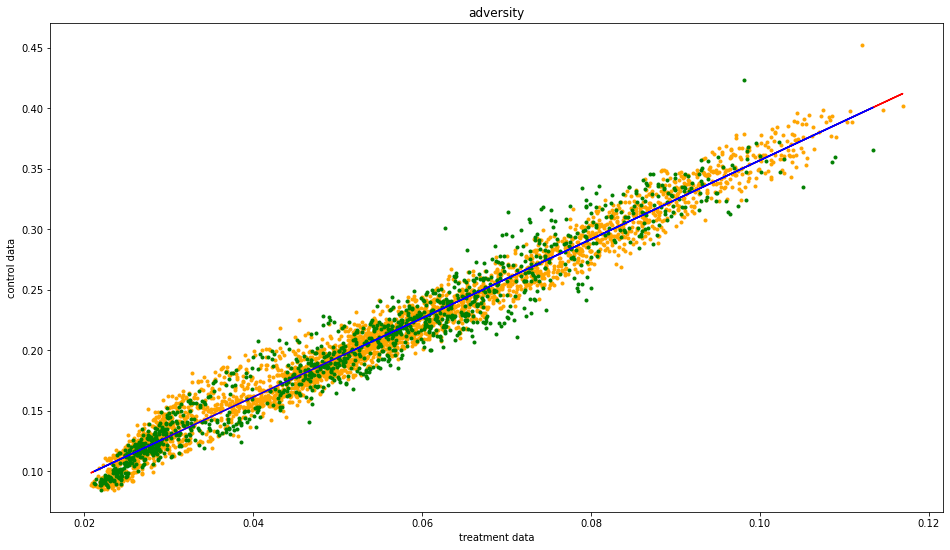

In [289]:
# adversity linear regression
selection_y_2012, selection_y_2013 = linear_regression(selection_2012_hourly_sum, selection_2013_hourly_sum, '2012', 'adversity')

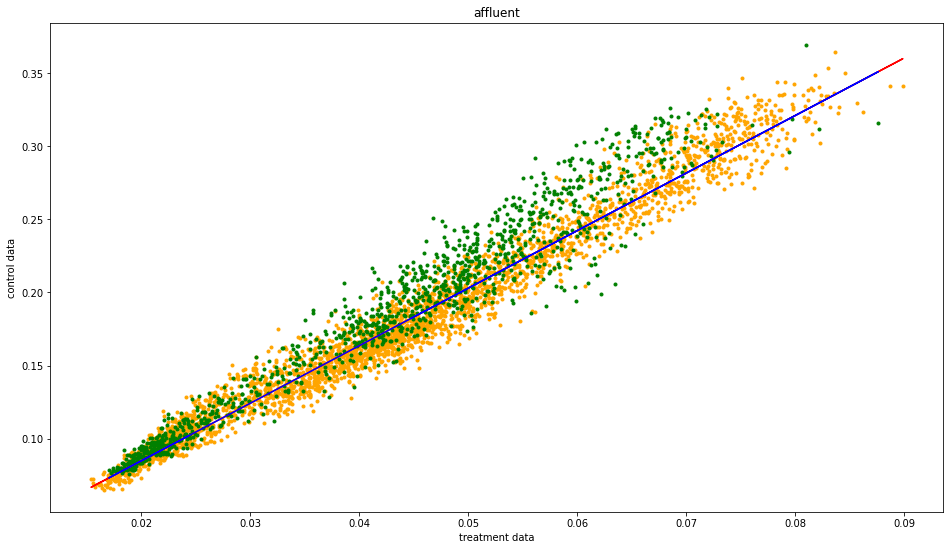

In [281]:
# affluent linear regression
selection_y_2012, selection_y_2013 = linear_regression(selection_2012_hourly_sum, selection_2013_hourly_sum, '2012', 'affluent')

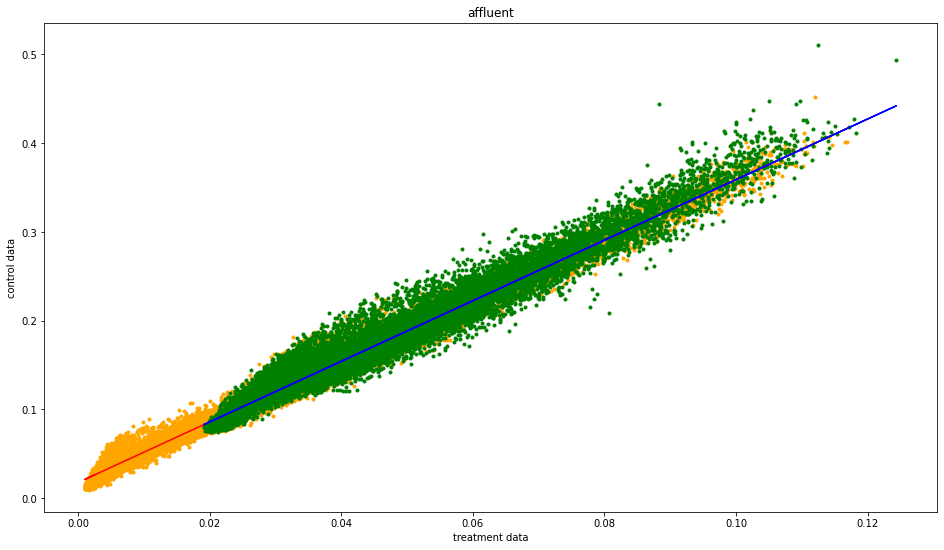

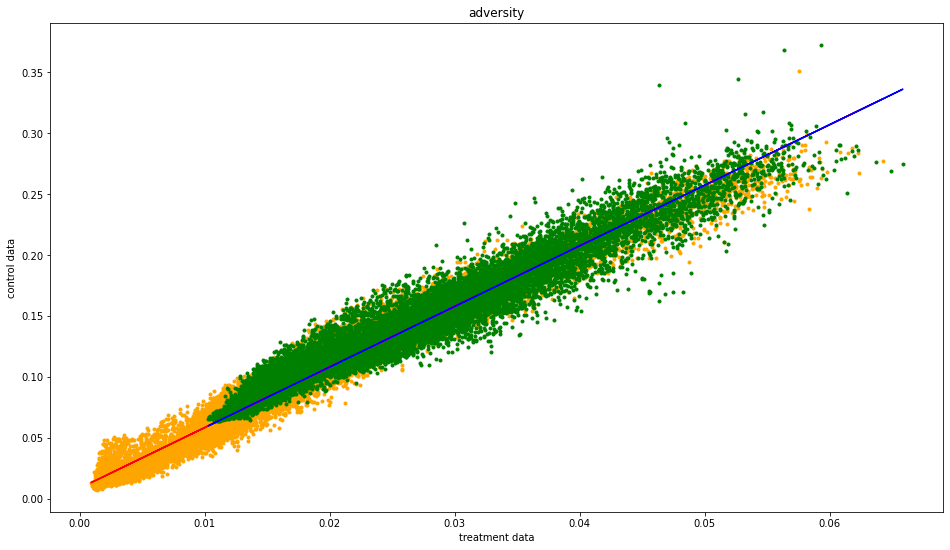

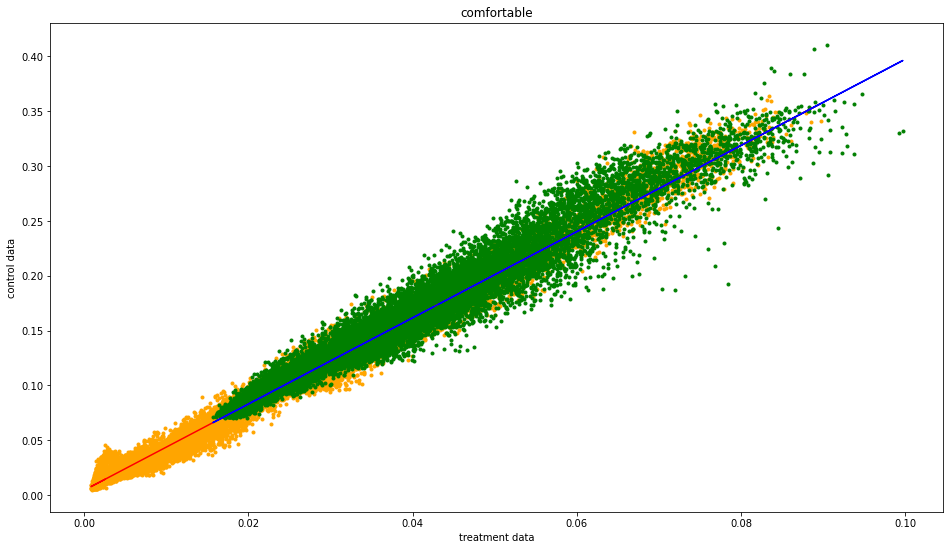

In [168]:
affluent_2012, affluent_2013 = linear_regression(affluent_2012_hourly_sum, affluent_2013_hourly_sum, '2012', 'affluent')
adversity_2012, adversity_2013 = linear_regression(adversity_2012_hourly_sum, adversity_2013_hourly_sum, '2012', 'adversity')
comfortable_2012, comfortable_2013 = linear_regression(comfortable_2012_hourly_sum, comfortable_2013_hourly_sum, '2012', 'comfortable')

In [ ]:
affluent_2012_hourly_sum['rescale'] = affluent_2012.reshape(1, -1)[0]
affluent_2013_hourly_sum['rescale'] = affluent_2013.reshape(1, -1)[0]

selection_2012_daily_sum = daily_sum(selection_2012_hourly_sum)
selection_2013_daily_sum = daily_sum(selection_2012_hourly_sum)

In [170]:
affluent_2012_hourly_sum['rescale'] = affluent_2012.reshape(1, -1)[0]
affluent_2013_hourly_sum['rescale'] = affluent_2013.reshape(1, -1)[0]

adversity_2012_hourly_sum['rescale'] = adversity_2012.reshape(1, -1)[0]
adversity_2013_hourly_sum['rescale'] = adversity_2013.reshape(1, -1)[0]

comfortable_2012_hourly_sum['rescale'] = comfortable_2012.reshape(1, -1)[0]
comfortable_2013_hourly_sum['rescale'] = comfortable_2013.reshape(1, -1)[0]

In [290]:
selection_2012_hourly_sum['rescale'] = selection_y_2012.reshape(1, -1)[0]
selection_2013_hourly_sum['rescale'] = selection_y_2013.reshape(1, -1)[0]

In [291]:
selection_2012_daily_sum = daily_sum(selection_2012_hourly_sum)
selection_2013_daily_sum = daily_sum(selection_2012_hourly_sum)

mean 2012: 4.767428282213907e-17
mean 2013: 0.009363222294528323
2012: -5.551115123125783e-17
2013: -1.1102230246251565e-16


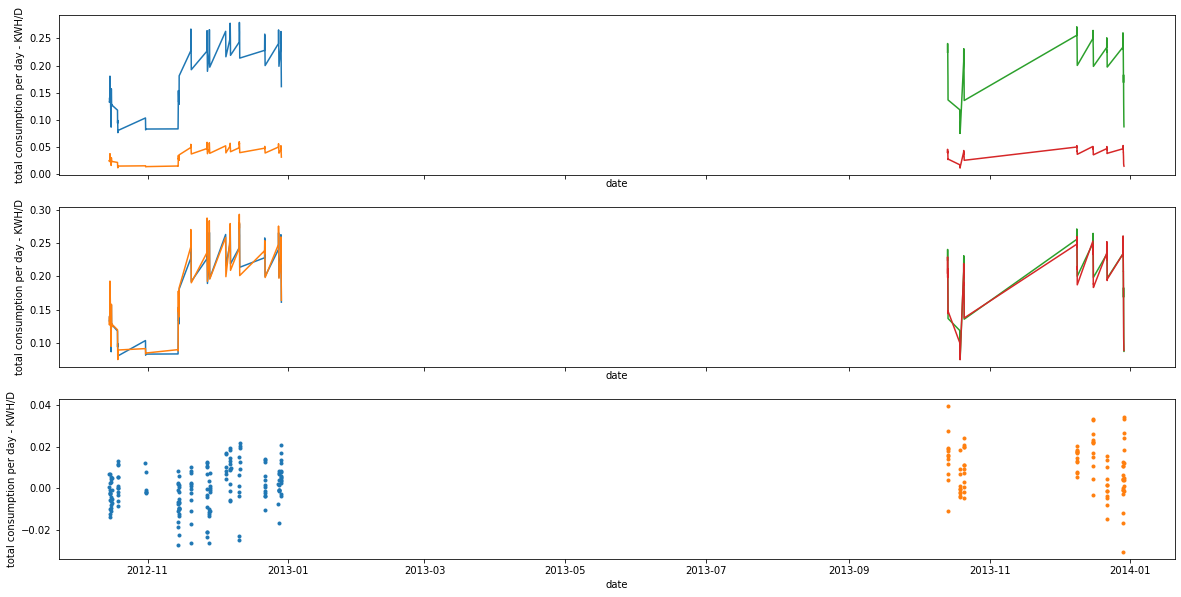

In [272]:
# adversity selection
plot_rescale(selection_2012_hourly_sum, selection_2013_hourly_sum, ['','','',''])

mean 2012: -2.1307310573614114e-17
mean 2013: 0.011377642818214767
2012: 0.0
2013: -8.881784197001252e-16


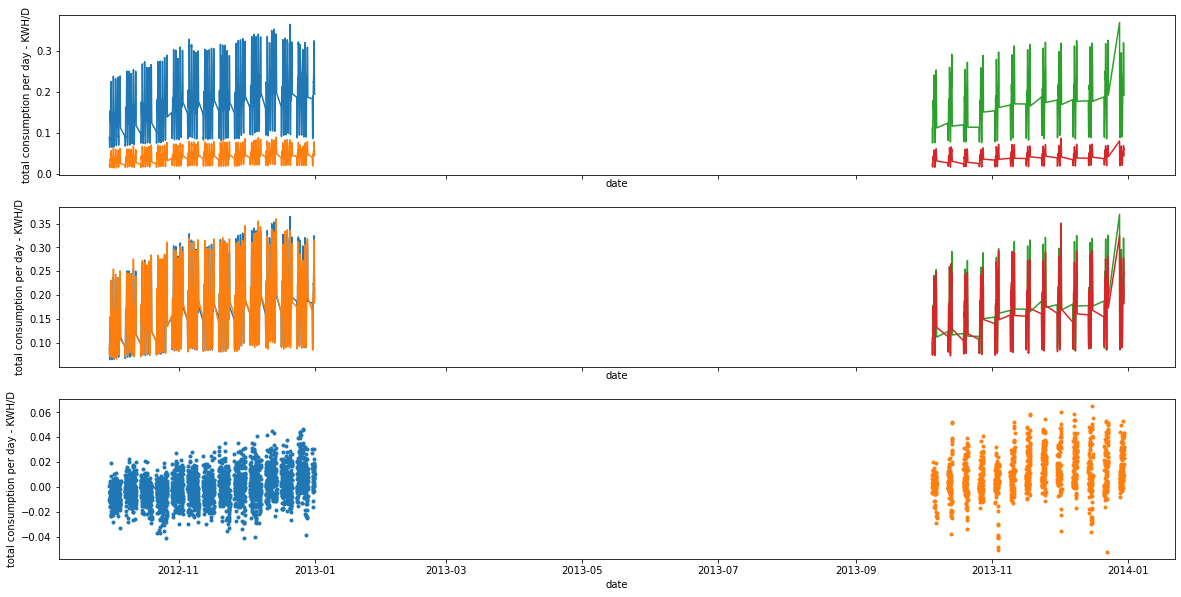

In [285]:
# comfortable selection
plot_rescale(selection_2012_hourly_sum, selection_2013_hourly_sum, ['','','',''])

mean 2012: 1.0653655286807057e-17
mean 2013: -0.0007524160304663014
2012: -2.6645352591003757e-15
2013: 8.881784197001252e-16


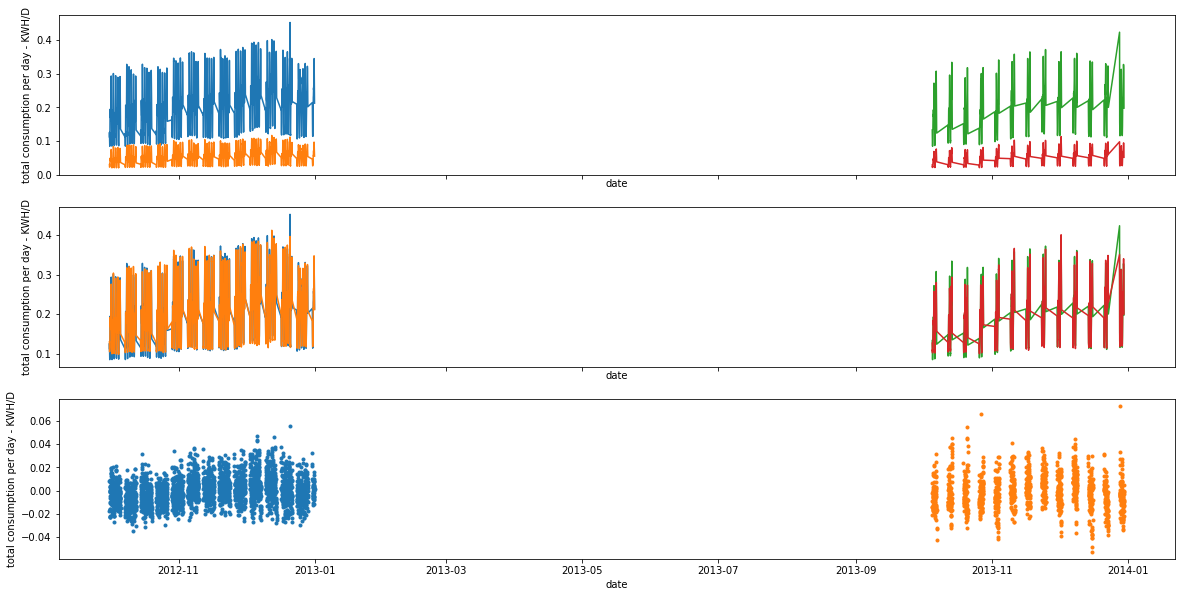

In [292]:
# affluent selection
plot_rescale(selection_2012_hourly_sum, selection_2013_hourly_sum, ['','','',''])

In [171]:
affluent_2012_daily_sum = daily_sum(affluent_2012_hourly_sum)
affluent_2013_daily_sum = daily_sum(affluent_2013_hourly_sum)

adversity_2012_daily_sum = daily_sum(adversity_2012_hourly_sum)
adversity_2013_daily_sum = daily_sum(adversity_2013_hourly_sum)

comfortable_2012_daily_sum = daily_sum(comfortable_2012_hourly_sum)
comfortable_2013_daily_sum = daily_sum(comfortable_2013_hourly_sum)

mean 2012: 4.853433987432379e-16
mean 2013: 0.12874557982918472
2012: -8.881784197001252e-16
2013: -1.4210854715202004e-14


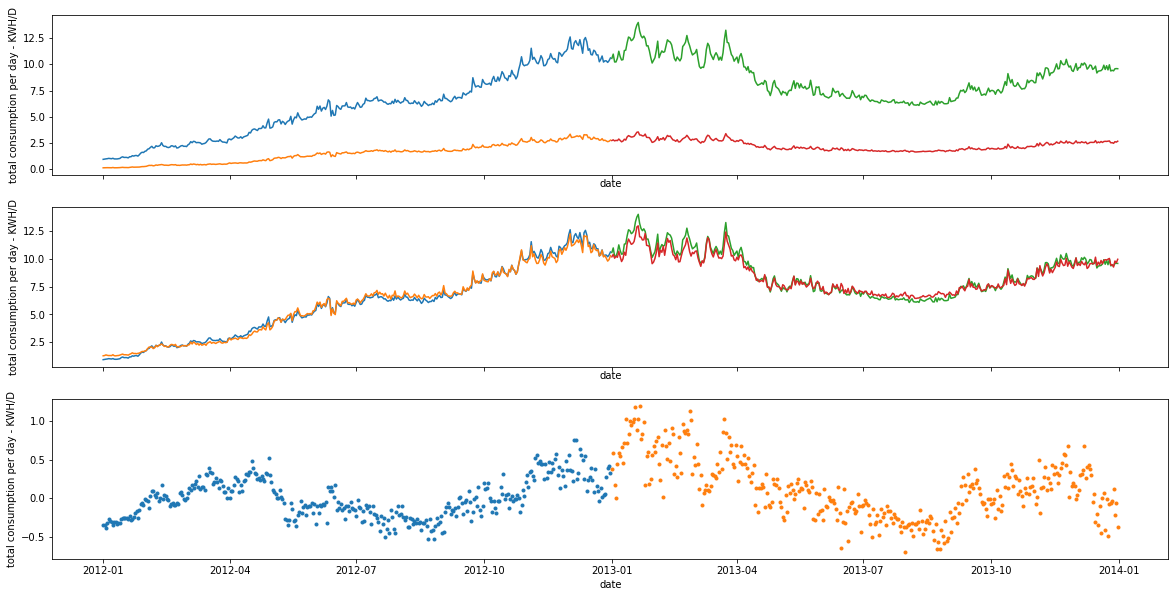

In [269]:
plot_rescale(affluent_2012_daily_sum, affluent_2013_daily_sum, ['','','',''])

mean 2012: 1.2910134406570127e-15
mean 2013: 0.14418292888892847
2012: -1.0658141036401503e-14
2013: -3.552713678800501e-15


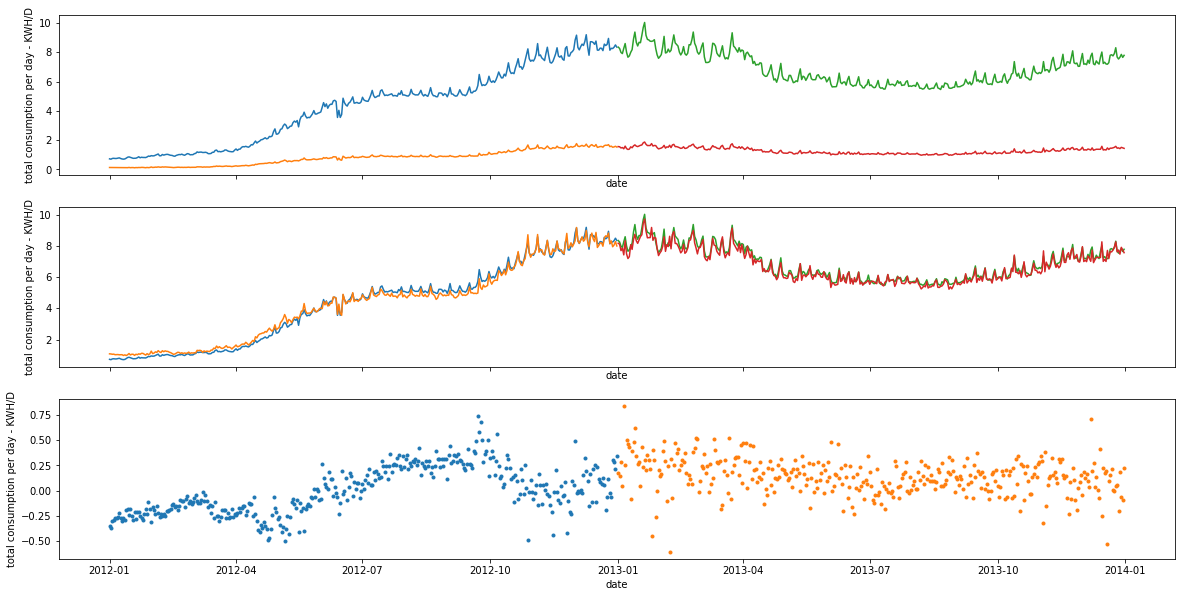

In [270]:
plot_rescale(adversity_2012_daily_sum, adversity_2013_daily_sum, ['','','',''])

In [637]:
0.042/12

0.0035

mean 2012: -4.853433987432378e-17
mean 2013: 0.19316318212178266
2012: -2.6645352591003757e-15
2013: 7.105427357601002e-15


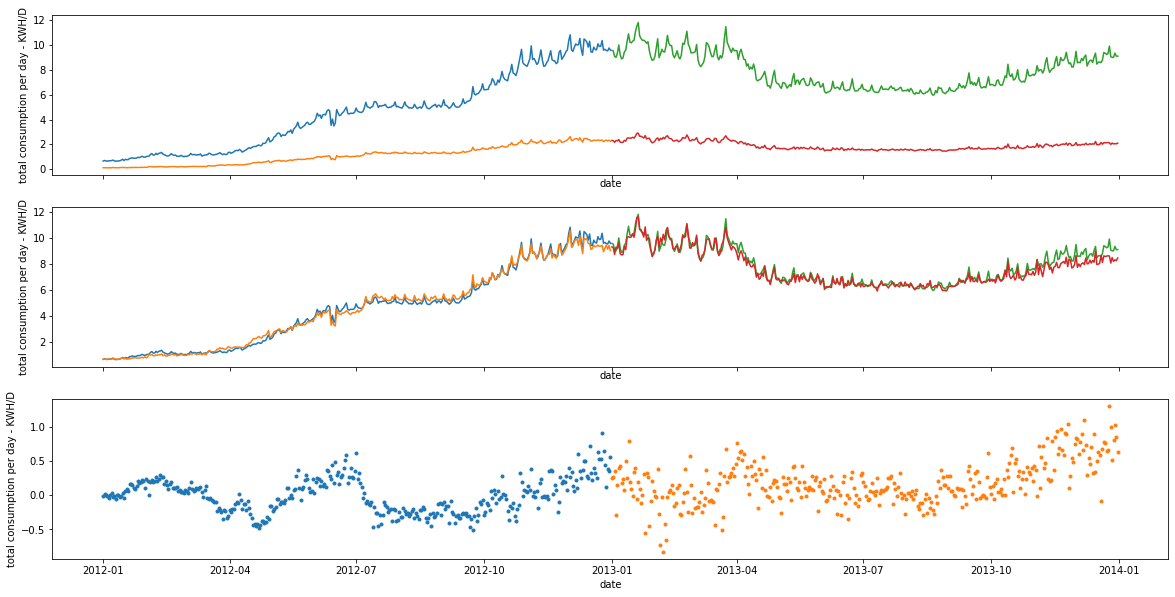

In [271]:
plot_rescale(comfortable_2012_daily_sum, comfortable_2013_daily_sum, ['','','',''])

In [115]:
comfortable_2012_daily_sum.head()

NameError: name 'comfortable_2012_daily_sum' is not defined

In [81]:
def plot_rescale(df_2012, df_2013, l, title):
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20, 10))
    
    ax1.plot(df_2012.index, df_2012[False], label=l[0])
    ax1.plot(df_2012.index, df_2012[True], label=l[1])
    ax1.plot(df_2013.index, df_2013[False], label=l[2])
    ax1.plot(df_2013.index, df_2013[True], label=l[3])
    ax1.set_xlabel('date')
    ax1.set_ylabel('total consumption per day - KWH/D')
    
    ax2.plot(df_2012.index, df_2012[False], label=l[0])
    ax2.plot(df_2012.index, df_2012['rescale'], label=l[1])
    ax2.plot(df_2013.index, df_2013[False], label=l[2])
    ax2.plot(df_2013.index, df_2013['rescale'], label=l[3])
    ax2.set_xlabel('date')
    ax2.set_ylabel('total consumption per day - KWH/D')
    
    ax3.scatter(df_2012.index, df_2012[False] - df_2012['rescale'], label=l[1], marker='.')
    ax3.scatter(df_2013.index, df_2013[False] - df_2013['rescale'], label=l[3], marker='.')
    ax3.set_xlabel('date')
    ax3.set_ylabel('total consumption per day - KWH/D')
    
    mean_2012 = (df_2012[False] - df_2012['rescale']).mean()
    mean_2013 = (df_2013[False] - df_2013['rescale']).mean()
    
    print('mean of the difference between the control and rescaled treatment group in 2012:', mean_2012)
    print('mean  of the difference between the control and rescaled treatment group in 2013:', mean_2013)
    print('2012:', (df_2012[False] - df_2012['rescale'] - mean_2012).sum())
    print('2013:', (df_2013[False] - df_2013['rescale'] - mean_2013).sum())

    ax.legend(loc=1); # upper left corner
    plt.plot()
    
    
    ax.set_title('total consumption in 2012 and 2013 for treatment and control groups - affluent group');

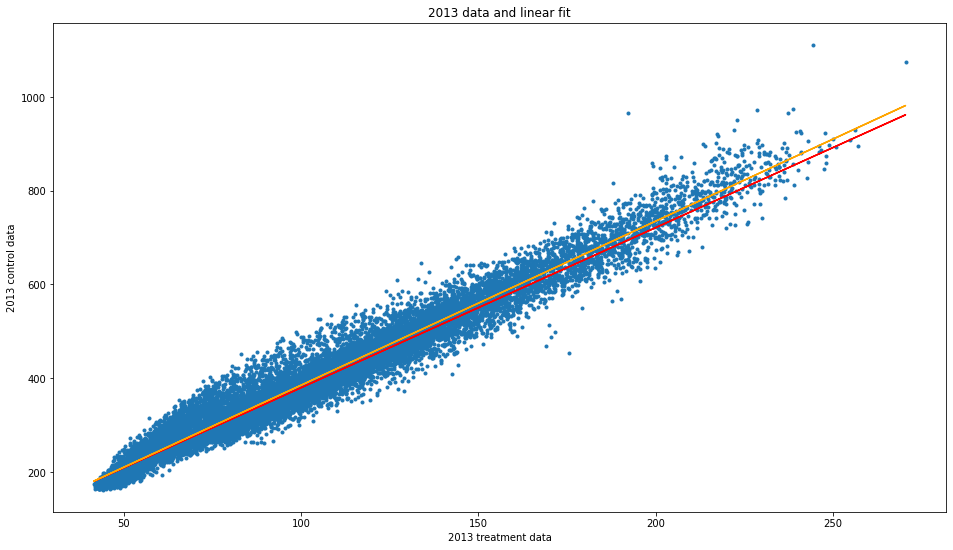

In [95]:
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, marker='.')
plt.title("2013 data and linear fit")
plt.xlabel("2013 treatment data")
plt.ylabel("2013 control data")
plt.plot(X, Y_pred_2013, color='red')
plt.plot(X, Y_pred_2013_other, color='orange')
plt.show()

In [116]:
affluent_2012_daily_sum = daily_sum(affluent_2012_hourly_sum)
affluent_2013_daily_sum = daily_sum(affluent_2013_hourly_sum)

adversity_2012_daily_sum = daily_sum(adversity_2012_hourly_sum)
adversity_2013_daily_sum = daily_sum(adversity_2013_hourly_sum)

comfortable_2012_daily_sum = daily_sum(comfortable_2012_hourly_sum)
comfortable_2013_daily_sum = daily_sum(comfortable_2013_hourly_sum)

NameError: name 'affluent_2012_hourly_sum' is not defined

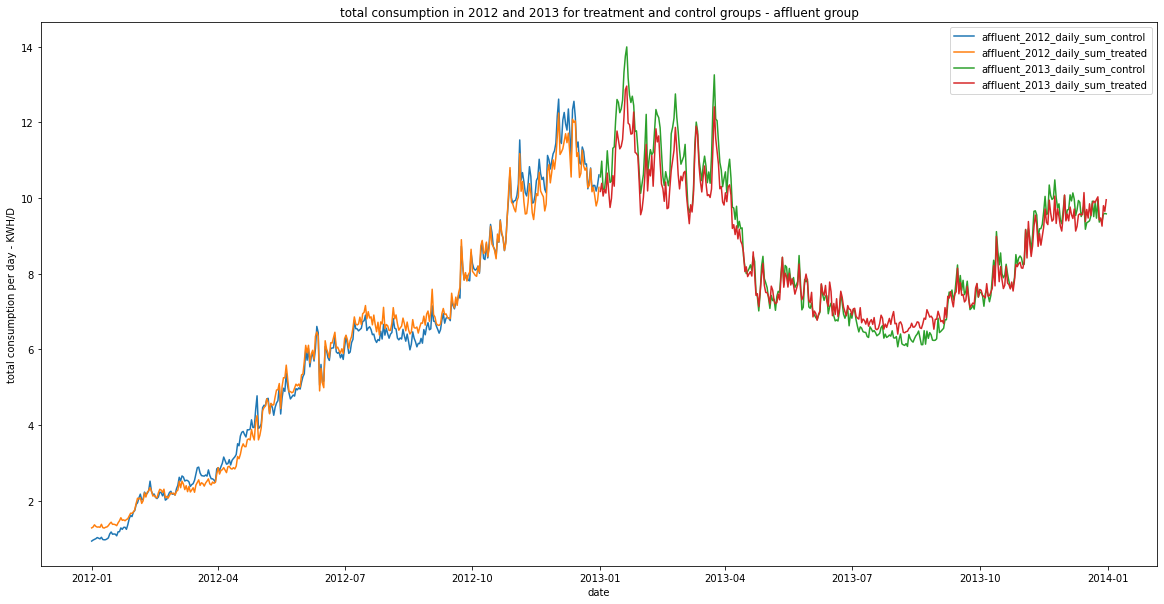

In [130]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(affluent_2012_daily_sum.index, affluent_2012_daily_sum[False], label="affluent_2012_daily_sum_control")
ax.plot(affluent_2012_daily_sum.index, affluent_2012_daily_sum[True], label="affluent_2012_daily_sum_treated")
ax.plot(affluent_2013_daily_sum.index, affluent_2013_daily_sum[False], label="affluent_2013_daily_sum_control")
ax.plot(affluent_2013_daily_sum.index, affluent_2013_daily_sum[True], label="affluent_2013_daily_sum_treated")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('total consumption per day - KWH/D')
ax.set_title('total consumption in 2012 and 2013 for treatment and control groups - affluent group');

In [18]:
selection_2012_unstacked = hourly_sum(selection_2012)

In [64]:
selection_2012.head()

,house_id,treated,date_time,KWH/hh,month,day,hour,minute,day_of_week,acorn_group,acorn_category
0,MAC000002,False,2012-10-12 00:30:00,0.0,10,12,0,30,4,ACORN-A,Affluent
1,MAC000002,False,2012-10-12 01:00:00,0.0,10,12,1,0,4,ACORN-A,Affluent
2,MAC000002,False,2012-10-12 01:30:00,0.0,10,12,1,30,4,ACORN-A,Affluent
3,MAC000002,False,2012-10-12 02:00:00,0.0,10,12,2,0,4,ACORN-A,Affluent
4,MAC000002,False,2012-10-12 02:30:00,0.0,10,12,2,30,4,ACORN-A,Affluent


In [206]:
treated_sum = selection_2012.groupby(['treated', 'house_id']).sum(['KWH/hh']).reset_index()
treated_sum = treated_sum.loc[treated_sum['treated'] == True][['house_id', 'KWH/hh']]
treated_sum.reset_index(inplace=True, drop=True)

treated_sum = treated_sum.sort_values(by='KWH/hh')
treated_sum.reset_index(inplace=True, drop=True)
treated_sum.head()

,house_id,KWH/hh
0,MAC001976,34.001
1,MAC004731,94.542
2,MAC003156,96.306
3,MAC004392,104.679
4,MAC000895,156.625


In [207]:
control_sum = selection_2012.groupby(['treated', 'house_id']).sum(['KWH/hh']).reset_index()
control_sum = control_sum.loc[control_sum['treated'] == False][['house_id', 'KWH/hh']]
control_sum.reset_index(inplace=True, drop=True)

control_sum = control_sum.sort_values(by='KWH/hh')
control_sum.reset_index(inplace=True, drop=True)
control_sum.head()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

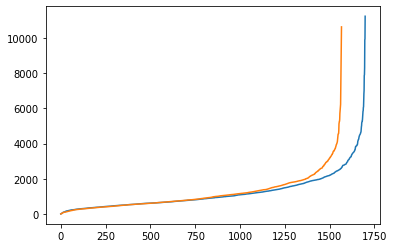

In [176]:
plt.plot(treated_sum['KWH/hh'])
plt.plot(treated_sum_2013['KWH/hh']);

# was the treatment effective for the affluent in X season, low consuming?
# how effective was the financial incentive

In [209]:
treated_sum_2013 = selection_2013.groupby(['treated', 'house_id']).sum(['KWH/hh']).reset_index()
treated_sum_2013 = treated_sum_2013.loc[treated_sum_2013['treated'] == True][['house_id', 'KWH/hh']]
treated_sum_2013.reset_index(inplace=True, drop=True)

treated_sum_2013 = treated_sum_2013.sort_values(by='KWH/hh')
treated_sum_2013.reset_index(inplace=True, drop=True)
treated_sum_2013.head()

,house_id,KWH/hh
0,MAC001437,14.862
1,MAC000666,16.646
2,MAC001976,37.807
3,MAC004731,72.161
4,MAC000895,82.244


In [208]:
control_sum_2013 = selection_2013.groupby(['treated', 'house_id']).sum(['KWH/hh']).reset_index()
control_sum_2013 = control_sum_2013.loc[control_sum_2013['treated'] == False][['house_id', 'KWH/hh']]
control_sum_2013.reset_index(inplace=True, drop=True)

control_sum_2013 = control_sum_2013.sort_values(by='KWH/hh')
control_sum_2013.reset_index(inplace=True, drop=True)
control_sum_2013.head()

,house_id,KWH/hh
0,MAC002096,0.007
1,MAC002564,0.297
2,MAC004421,1.349
3,MAC000037,6.672
4,MAC000028,16.427


In [210]:
common_treatment_low_using = set(treated_sum_2013[:200]['house_id']).intersection(set(treated_sum[:200]['house_id']))

In [211]:
common_control_low_using = set(control_sum_2013[:200]['house_id']).intersection(set(control_sum[:200]['house_id']))

In [213]:
selection_2012_low_using = selection_2012.loc[selection_2012['house_id'].isin(common_control_low_using)]

In [214]:
selection_2013_low_using = selection_2013.loc[selection_2013['house_id'].isin(common_control_low_using)]

In [215]:
selection_2012_low_using.reset_index(inplace=True, drop=True)
selection_2013_low_using.reset_index(inplace=True, drop=True)

In [216]:
selection_2012_low_using_treatment = selection_2012.loc[selection_2012['house_id'].isin(common_treatment_low_using)]
selection_2013_low_using_treatment = selection_2013.loc[selection_2013['house_id'].isin(common_treatment_low_using)]

selection_2012_low_using_treatment.reset_index(inplace=True, drop=True)
selection_2013_low_using_treatment.reset_index(inplace=True, drop=True)

In [217]:
hourly_sum_2012 = hourly_sum(selection_2012_low_using)
hourly_sum_2013 = hourly_sum(selection_2012_low_using)
print(len(hourly_sum_2012), 92 * 48)
print(len(hourly_sum_2013), 92 * 48)

4416 4416
4416 4416


In [218]:
hourly_sum_2012_treatment = hourly_sum(selection_2012_low_using_treatment)
hourly_sum_2013_treatment = hourly_sum(selection_2012_low_using_treatment)
print(len(hourly_sum_2012_treatment), 92 * 48)
print(len(hourly_sum_2013_treatment), 92 * 48)

4416 4416
4416 4416


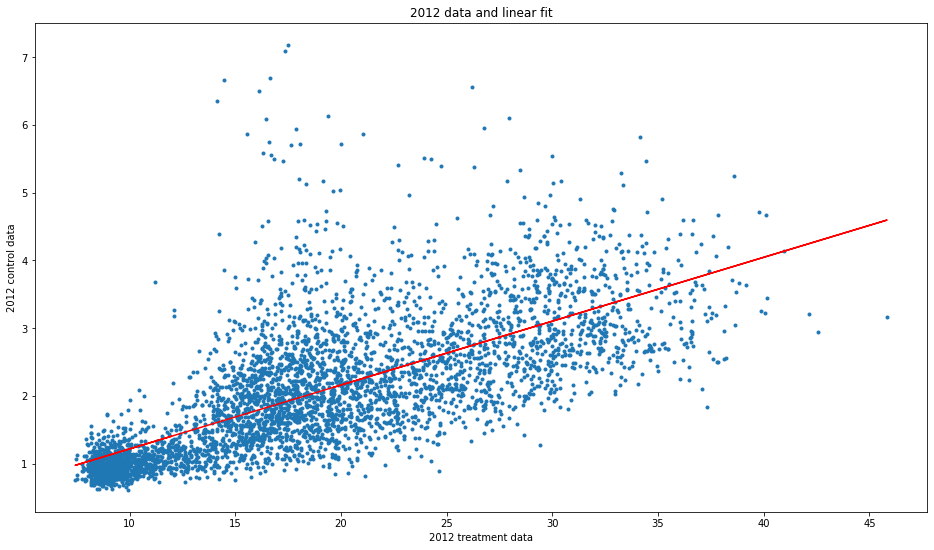

In [227]:
X = hourly_sum_2012_treatment.values.reshape(-1, 1)
Y = hourly_sum_2012.values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred_2012 = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(16, 9))
plt.scatter(X, Y, marker='.')
plt.title("2012 data and linear fit")
plt.xlabel("2012 treatment data")
plt.ylabel("2012 control data")
plt.plot(X, Y_pred_2012, color='red')
plt.show()

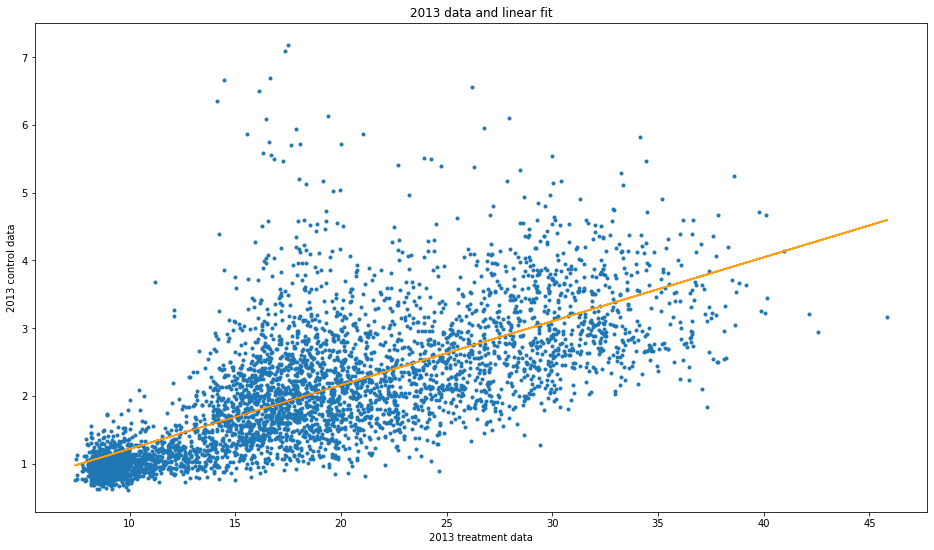

In [232]:
X = hourly_sum_2013_treatment.values.reshape(-1, 1)
Y = hourly_sum_2013.values.reshape(-1, 1)

linear_regressor_other = LinearRegression()  # create object for the class
linear_regressor_other.fit(X, Y)  # perform linear regression
Y_pred_2013 = linear_regressor.predict(X)  # make predictions
Y_pred_2013_other = linear_regressor_other.predict(X)  # make predictions

plt.figure(figsize=(16, 9))
plt.scatter(X, Y, marker='.')
plt.title("2013 data and linear fit")
plt.xlabel("2013 treatment data")
plt.ylabel("2013 control data")
plt.plot(X, Y_pred_2013, color='red')
plt.plot(X, Y_pred_2013_other, color='orange')
plt.show()

In [63]:
# df = [adversity_2012, comfortable_2012, affluent_2012, 
#       adversity_2013, comfortable_2013, affluent_2013]

In [19]:
# socio-economic, affluent
# time 2:30 pm
# only weekends, day of week 5, 6
# months 10, 11, 12

selection_2012 = affluent_2012.loc[((affluent_2012['month'] == 10) |
                                    (affluent_2012['month'] == 11) |
                                    (affluent_2012['month'] == 12)) &
                                   ((affluent_2012['day_of_week'] != 5) &
                                    (affluent_2012['day_of_week'] != 6))
                                  ]

# 2013-12-28 19:00:00

# selection_2012 = affluent_2012.loc[(affluent_2012['hour'] == 19) &
#                               (affluent_2012['minute'] == 0) &
#                               (affluent_2012['day'] == 28) & 
#                               (affluent_2012['month'] == 12)
#                              ]

selection_2012 = selection_2012.reset_index(drop=True)

In [20]:
selection_2012['house_id'].nunique()

2185

In [198]:
selection_2013['house_id'].nunique()

2027

In [287]:
# selection_2013 = affluent_2013.loc[((affluent_2013['month'] == 10) |
#                                     (affluent_2013['month'] == 11) |
#                                     (affluent_2013['month'] == 12))
#                                   ]

# selection_2013 = affluent_2013.loc[(affluent_2013['hour'] == 14) &
#                               (affluent_2013['minute'] == 30) &
#                               ((affluent_2013['day_of_week'] == 5) |
#                               (affluent_2013['day_of_week'] == 6)) & 
#                               ((affluent_2013['month'] == 10) |
#                               (affluent_2013['month'] == 11) |
#                               (affluent_2013['month'] == 12))
#                              ]

selection_2013 = affluent_2013.loc[((affluent_2013['day_of_week'] == 5) |
                              (affluent_2013['day_of_week'] == 6)) & 
                              ((affluent_2013['month'] == 10) |
                              (affluent_2013['month'] == 11) |
                              (affluent_2013['month'] == 12))
                             ]

# selection_2013 = affluent_2013.loc[(affluent_2013['hour'] == 19) &
#                               (affluent_2013['minute'] == 0) &
#                               (affluent_2013['day'] == 28) & 
#                               (affluent_2013['month'] == 12)
#                              ]

selection_2013 = selection_2013.reset_index(drop=True)

In [276]:
selection_2012 = selection_2012.loc[selection_2012['date_time'].isin(highs_2012)]
selection_2013 = selection_2013.loc[selection_2013['date_time'].isin(highs)]

In [199]:
selected_treatment_houses_2012 = set(selection_2012['house_id'].loc[selection_2012['treated']])
selected_treatment_houses_2013 = set(selection_2013['house_id'].loc[selection_2013['treated']])

print('unique selected_treatment_houses_2012', len(selected_treatment_houses_2012))
print('unique selected_treatment_houses_2013', len(selected_treatment_houses_2013))

common_treatment_houses = selected_treatment_houses_2012.intersection(selected_treatment_houses_2013)
print('common_treatment_houses', len(common_treatment_houses))

unique selected_treatment_houses_2012 486
unique selected_treatment_houses_2013 461
common_treatment_houses 458


In [200]:
selected_control_houses_2012 = set(selection_2012['house_id'].loc[~selection_2012['treated']])
selected_control_houses_2013 = set(selection_2013['house_id'].loc[~selection_2013['treated']])

print('unique selected_control_houses_2012', len(selected_control_houses_2012))
print('unique selected_control_houses_2013', len(selected_control_houses_2013))

common_control_houses = selected_control_houses_2012.intersection(selected_control_houses_2013)
print('common_control_houses', len(common_control_houses))

unique selected_control_houses_2012 1699
unique selected_control_houses_2013 1566
common_control_houses 1564


In [201]:
sel_control_2012 = selection_2012[['date_time', 'KWH/hh']].loc[selection_2012['house_id'].isin(common_control_houses)]
sel_treatment_2012 = selection_2012[['date_time', 'KWH/hh']].loc[selection_2012['house_id'].isin(common_treatment_houses)]

# sel_control_2012['date_time'] = sel_control_2013['date_time'].dt.date
# sel_treatment_2012['date_time'] = sel_treatment_2012['date_time'].dt.date

In [202]:
print('control', len(sel_control_2012))
print('treatment', len(sel_treatment_2012))

control 4888593
treatment 1439350


In [203]:
sel_control_2013 = selection_2013[['date_time', 'KWH/hh']].loc[selection_2013['house_id'].isin(common_control_houses)]
sel_treatment_2013 = selection_2013[['date_time', 'KWH/hh']].loc[selection_2013['house_id'].isin(common_treatment_houses)]

# sel_control_2013['date_time'] = sel_control_2013['date_time'].dt.date
# sel_treatment_2013['date_time'] = sel_treatment_2013['date_time'].dt.date

In [204]:
print('control', len(sel_control_2013))
print('treatment', len(sel_treatment_2013))

control 1925765
treatment 569112


In [350]:
sel_control_2012 = sel_control_2012.sort_values(by='KWH/hh')
sel_treatment_2012 = sel_treatment_2012.sort_values(by='KWH/hh')

In [351]:
sel_control_2013 = sel_control_2013.sort_values(by='KWH/hh')
sel_treatment_2013 = sel_treatment_2013.sort_values(by='KWH/hh')

In [355]:
group_boundaries_2012 = np.linspace(0, len(sel_control_2012)-1, len(sel_treatment_2012)).round().astype('i8')
sel_control_modified_2012 = np.add.reduceat(sel_control_2012['KWH/hh'].values, 
                                            group_boundaries_2012)[:-1]/np.diff(group_boundaries_2012)

In [353]:
group_boundaries_2012 = np.linspace(0, len(sel_control_2012)-1, len(sel_treatment_2012)).round().astype('i8')
sel_control_modified_2012 = np.add.reduceat(sel_control_2012.values, 
                                            group_boundaries_2012)[:-1]/np.diff(group_boundaries_2012)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [312]:
group_boundaries_2013 = np.linspace(0, len(sel_control_2013)-1, len(sel_treatment_2013)).round().astype('i8')
sel_control_modified_2013 = np.add.reduceat(sel_control_2013.values, 
                                            group_boundaries_2013)[:-1]/np.diff(group_boundaries_2013)

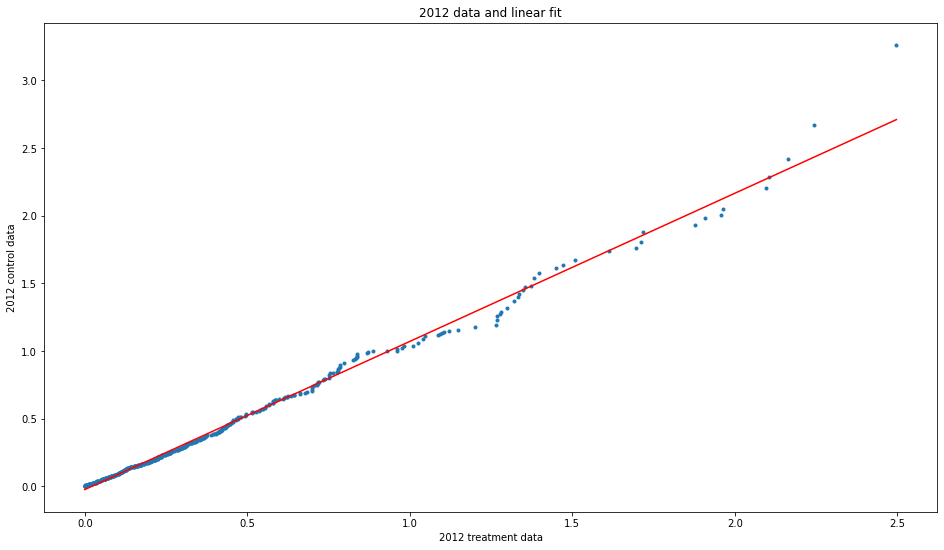

In [313]:
from sklearn.linear_model import LinearRegression

X = sel_treatment_2012[:-1].values.reshape(-1, 1)
Y = sel_control_modified_2012.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(16, 9))
plt.scatter(X, Y, marker='.')
plt.title("2012 data and linear fit")
plt.xlabel("2012 treatment data")
plt.ylabel("2012 control data")
plt.plot(X, Y_pred, color='red')
plt.show()

In [320]:
# for dec 28, 7pm 
print(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])

1.095247691022509 -0.02479796343410373


In [336]:
print((Y_pred  * 11.76).mean())
print((sel_control_2012 * 11.76).mean())
print((Y_pred_2013 * 67.2).mean())
print((sel_control_2013 * 11.76).mean())

4.802774029150442
4.826792125499009
24.81661948607345
4.87876774542234


In [321]:
print(Y_pred.mean())
print(sel_control_2012.mean())
print(Y_pred_2013.mean())
print(sel_control_2013.mean())

0.40839915213864314
0.41044150727032386
0.36929493282847387
0.4148612028420356


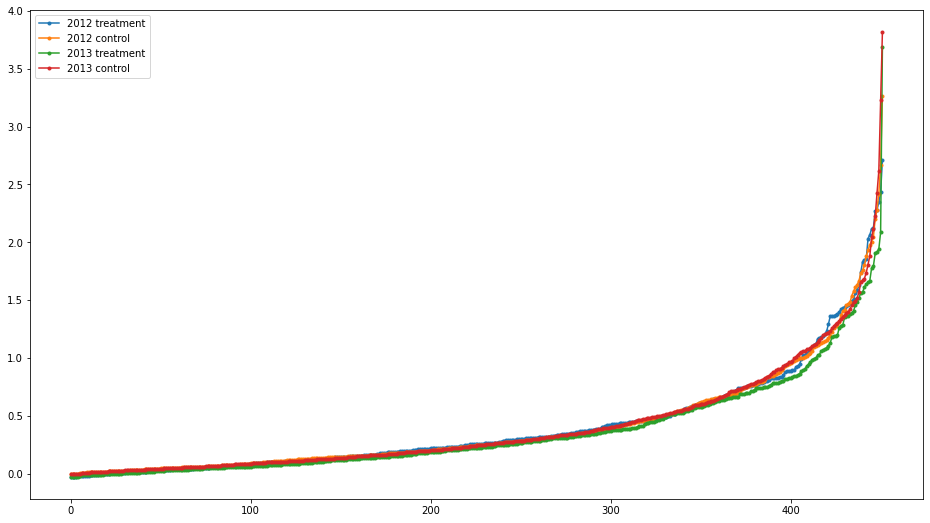

In [324]:
plt.figure(figsize=(16, 9))

plt.plot(Y_pred, marker='.', label='2012 treatment')
plt.plot(sel_control_modified_2012, marker='.', label='2012 control')

plt.plot(Y_pred_2013, marker='.', label='2013 treatment')
plt.plot(sel_control_modified_2013, marker='.', label='2013 control')

plt.legend()
plt.show()

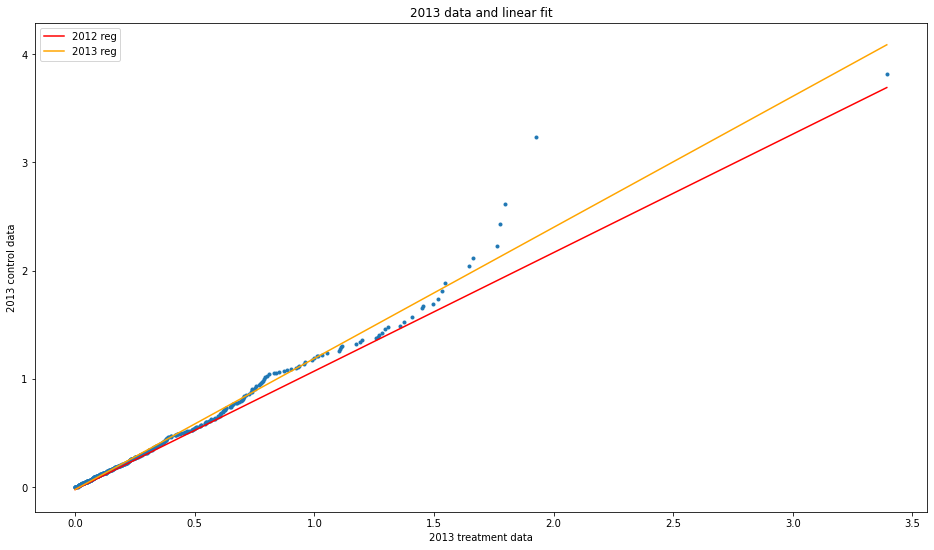

In [314]:
X = sel_treatment_2013[:-1].values.reshape(-1, 1)
Y = sel_control_modified_2013.reshape(-1, 1)

linear_regressor_other = LinearRegression()  # create object for the class
linear_regressor_other.fit(X, Y)  # perform linear regression
Y_pred_2013 = linear_regressor.predict(X)  # make predictions
Y_pred_2013_other = linear_regressor_other.predict(X)  # make predictions

plt.figure(figsize=(16, 9))
plt.scatter(X, Y, marker='.')
plt.title("2013 data and linear fit")
plt.xlabel("2013 treatment data")
plt.ylabel("2013 control data")
plt.plot(X, Y_pred_2013, color='red', label='2012 reg')
plt.plot(X, Y_pred_2013_other, color='orange', label='2013 reg')
plt.legend()
plt.show()

In [329]:
tariffs.loc[tariffs['tariff'] == 'High'][-20:]

,tariff,p/kWh
date_time,,
2013-12-28 19:00:00,High,67.2
2013-12-28 19:30:00,High,67.2
2013-12-28 20:00:00,High,67.2
2013-12-28 20:30:00,High,67.2
2013-12-28 21:00:00,High,67.2
2013-12-28 21:30:00,High,67.2
2013-12-28 22:00:00,High,67.2
2013-12-28 22:30:00,High,67.2
2013-12-28 23:00:00,High,67.2


In [257]:
print(Y_pred.mean())
print(sel_control_2012.mean())
print(Y_pred_2013.mean())
print(sel_control_2013.mean())

0.33367786319750364
0.33720263138157897
0.2820977977086012
0.31737631578947373


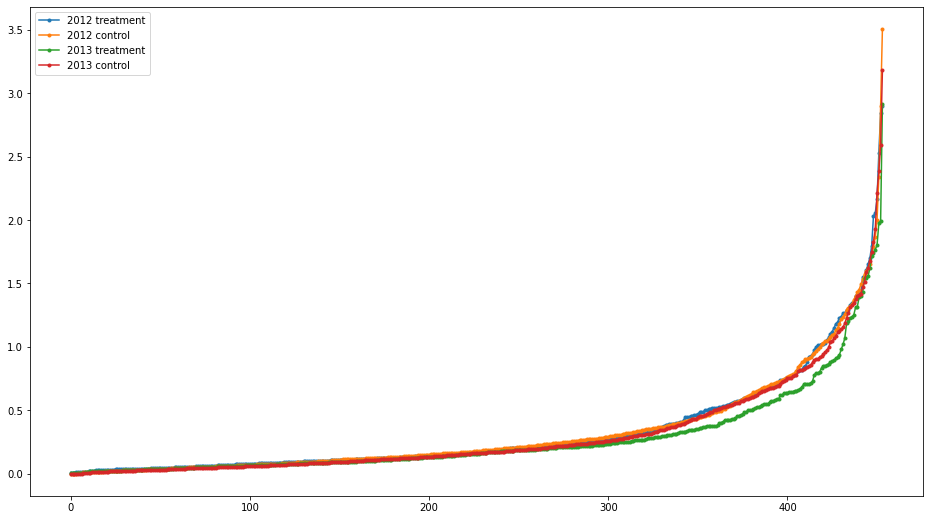

In [240]:
plt.figure(figsize=(16, 9))

plt.plot(Y_pred, marker='.', label='2012 treatment')
plt.plot(sel_control_modified_2012, marker='.', label='2012 control')

plt.plot(Y_pred_2013, marker='.', label='2013 treatment')
plt.plot(sel_control_modified_2013, marker='.', label='2013 control')

plt.legend()
plt.show()

In [129]:
selection_2013.groupby()

,house_id,treated,date_time,KWH/hh,month,day,hour,minute,day_of_week,acorn_group,acorn_category
0,MAC000002,False,2013-01-05 14:30:00,0.096,1,5,14,30,5,ACORN-A,Affluent
1,MAC000002,False,2013-01-06 14:30:00,0.098,1,6,14,30,6,ACORN-A,Affluent
2,MAC000002,False,2013-01-12 14:30:00,0.105,1,12,14,30,5,ACORN-A,Affluent
3,MAC000002,False,2013-01-13 14:30:00,0.116,1,13,14,30,6,ACORN-A,Affluent
4,MAC000002,False,2013-01-19 14:30:00,0.187,1,19,14,30,5,ACORN-A,Affluent


In [14]:
for i in range(1, 13):
    print('number of unique houses in 2012 in month', i, ':', 
          total_usage_2012.loc[total_usage_2012['month'] == i]['house_id'].nunique())

number of unique houses in 2012 in month 1 : 581
number of unique houses in 2012 in month 2 : 843
number of unique houses in 2012 in month 3 : 1235
number of unique houses in 2012 in month 4 : 2112
number of unique houses in 2012 in month 5 : 3671
number of unique houses in 2012 in month 6 : 4212
number of unique houses in 2012 in month 7 : 4755
number of unique houses in 2012 in month 8 : 4764
number of unique houses in 2012 in month 9 : 5007
number of unique houses in 2012 in month 10 : 5522
number of unique houses in 2012 in month 11 : 5534
number of unique houses in 2012 in month 12 : 5537


In [15]:
for i in range(1, 13):
    print('number of unique houses in 2013 in month', i, ':', 
          total_usage_2013.loc[total_usage_2013['month'] == i]['house_id'].nunique())

number of unique houses in 2013 in month 1 : 5515
number of unique houses in 2013 in month 2 : 5491
number of unique houses in 2013 in month 3 : 5442
number of unique houses in 2013 in month 4 : 5409
number of unique houses in 2013 in month 5 : 5383
number of unique houses in 2013 in month 6 : 5357
number of unique houses in 2013 in month 7 : 5341
number of unique houses in 2013 in month 8 : 5295
number of unique houses in 2013 in month 9 : 5255
number of unique houses in 2013 in month 10 : 5216
number of unique houses in 2013 in month 11 : 5195
number of unique houses in 2013 in month 12 : 5134


In [132]:
selection_2013['house_id'].nunique()

2171

In [22]:
household_mean_daily_consumption(comfortable_2012)

treated,False,True
date_time,,
2012-01-01,10.192918,10.548294
2012-01-02,10.974196,10.940176
2012-01-03,10.106960,10.112588
2012-01-04,10.020879,10.324294
2012-01-05,10.201283,11.300471
...,...,...
2012-12-27,12.408012,10.785647
2012-12-28,12.283265,11.062231
2012-12-29,12.237448,10.694387


In [232]:
lows = tariffs.index[tariffs['tariff'] == 'Low']
normals = tariffs.index[tariffs['tariff'] == 'Normal']
highs = tariffs.index[tariffs['tariff'] == 'High']

In [6]:
low_affluent = affluent_2013.loc[affluent_2013['date_time'].isin(lows)]
normal_affluent = affluent_2013.loc[affluent_2013['date_time'].isin(normals)]
high_affluent = affluent_2013.loc[affluent_2013['date_time'].isin(highs)]

low_adversity = adversity_2013.loc[adversity_2013['date_time'].isin(lows)]
normal_adversity = adversity_2013.loc[adversity_2013['date_time'].isin(normals)]
high_adversity = adversity_2013.loc[adversity_2013['date_time'].isin(highs)]

low_comfortable = comfortable_2013.loc[comfortable_2013['date_time'].isin(lows)]
normal_comfortable = comfortable_2013.loc[comfortable_2013['date_time'].isin(normals)]
high_comfortable = comfortable_2013.loc[comfortable_2013['date_time'].isin(highs)]

In [7]:
def usage_hour(df):
    df.drop(columns=['house_id'], inplace=True)
    df.loc[:, 'hour'] = df['date_time'].dt.hour
    df.drop(columns=['date_time'], inplace=True)
    return df

low_affluent = usage_hour(low_affluent)
normal_affluent = usage_hour(normal_affluent)
high_affluent = usage_hour(high_affluent)

low_adversity = usage_hour(low_adversity)
normal_adversity = usage_hour(normal_adversity)
high_adversity = usage_hour(high_adversity)

low_comfortable = usage_hour(low_comfortable)
normal_comfortable = usage_hour(normal_comfortable)
high_comfortable = usage_hour(high_comfortable)

/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sabanejad/Projects/demand-response/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [10]:
def usage_hh_treatment_control(df):
    hh_usage = {}
    hh_usage_control = {}
    for i in range(0, 24):
        hh_usage[i] = df[(df['hour'] == i) & (df['treated'] == True)].reset_index(drop=True)['KWH/hh']
        hh_usage_control[i] = df[(df['hour'] == i) & (df['treated'] == False)].reset_index(drop=True)['KWH/hh']
    return hh_usage, hh_usage_control

In [18]:
high_affluent

,treated,KWH/hh,acorn_group,acorn_category,hour
334,False,0.236,ACORN-A,Affluent,23
335,False,0.277,ACORN-A,Affluent,23
336,False,0.229,ACORN-A,Affluent,0
337,False,0.251,ACORN-A,Affluent,0
338,False,0.223,ACORN-A,Affluent,1
...,...,...,...,...,...
36393951,True,0.045,ACORN-C,Affluent,2
36393952,True,0.073,ACORN-C,Affluent,3
36393953,True,0.110,ACORN-C,Affluent,3
36393954,True,0.122,ACORN-C,Affluent,4


In [11]:
treatment_high_affluent, control_high_affluent = usage_hh_treatment_control(high_affluent)
treatment_normal_affluent, control_normal_affluent = usage_hh_treatment_control(normal_affluent)
treatment_low_affluent, control_low_affluent = usage_hh_treatment_control(low_affluent)

treatment_high_adversity, control_high_adversity = usage_hh_treatment_control(high_adversity)
treatment_normal_adversity, control_normal_adversity = usage_hh_treatment_control(normal_adversity)
treatment_low_adversity, control_low_adversity = usage_hh_treatment_control(low_adversity)

treatment_high_comfortable, control_high_comfortable = usage_hh_treatment_control(high_comfortable)
treatment_normal_comfortable, control_normal_comfortable = usage_hh_treatment_control(normal_comfortable)
treatment_low_comfortable, control_low_comfortable = usage_hh_treatment_control(low_comfortable)

In [7]:
from scipy.stats import gaussian_kde

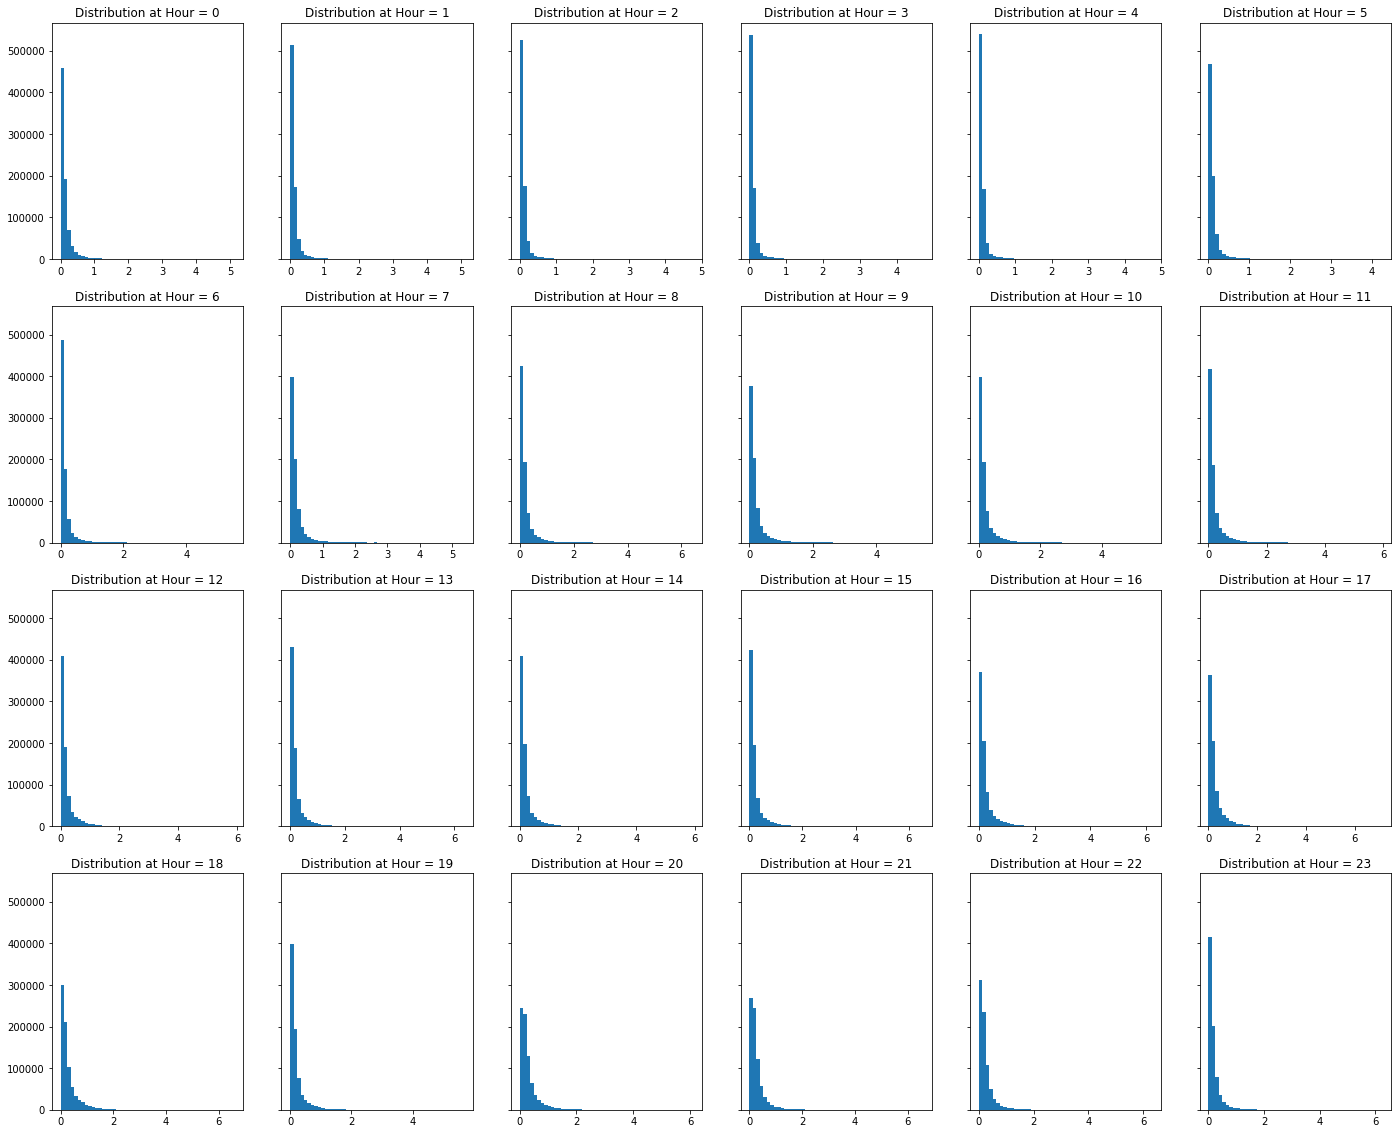

In [31]:
fig, axs = plt.subplots(4, 6, sharey=True, figsize=(24, 20))

axs[0, 0].hist(hh_usage[0], bins=50)
axs[0, 0].set_title('Distribution at Hour = 0')
axs[0, 1].hist(hh_usage[1], bins=50)
axs[0, 1].set_title('Distribution at Hour = 1')
axs[0, 2].hist(hh_usage[2], bins=50)
axs[0, 2].set_title('Distribution at Hour = 2')
axs[0, 3].hist(hh_usage[3], bins=50)
axs[0, 3].set_title('Distribution at Hour = 3')
axs[0, 4].hist(hh_usage[4], bins=50)
axs[0, 4].set_title('Distribution at Hour = 4')
axs[0, 5].hist(hh_usage[5], bins=50)
axs[0, 5].set_title('Distribution at Hour = 5')


axs[1, 0].hist(hh_usage[6], bins=50)
axs[1, 0].set_title('Distribution at Hour = 6')
axs[1, 1].hist(hh_usage[7], bins=50)
axs[1, 1].set_title('Distribution at Hour = 7')
axs[1, 2].hist(hh_usage[8], bins=50)
axs[1, 2].set_title('Distribution at Hour = 8')
axs[1, 3].hist(hh_usage[9], bins=50)
axs[1, 3].set_title('Distribution at Hour = 9')
axs[1, 4].hist(hh_usage[10], bins=50)
axs[1, 4].set_title('Distribution at Hour = 10')
axs[1, 5].hist(hh_usage[11], bins=50)
axs[1, 5].set_title('Distribution at Hour = 11')

axs[2, 0].hist(hh_usage[12], bins=50)
axs[2, 0].set_title('Distribution at Hour = 12')
axs[2, 1].hist(hh_usage[13], bins=50)
axs[2, 1].set_title('Distribution at Hour = 13')
axs[2, 2].hist(hh_usage[14], bins=50)
axs[2, 2].set_title('Distribution at Hour = 14')
axs[2, 3].hist(hh_usage[15], bins=50)
axs[2, 3].set_title('Distribution at Hour = 15')
axs[2, 4].hist(hh_usage[16], bins=50)
axs[2, 4].set_title('Distribution at Hour = 16')
axs[2, 5].hist(hh_usage[17], bins=50)
axs[2, 5].set_title('Distribution at Hour = 17')

axs[3, 0].hist(hh_usage[18], bins=50)
axs[3, 0].set_title('Distribution at Hour = 18')
axs[3, 1].hist(hh_usage[10], bins=50)
axs[3, 1].set_title('Distribution at Hour = 19')
axs[3, 2].hist(hh_usage[20], bins=50)
axs[3, 2].set_title('Distribution at Hour = 20')
axs[3, 3].hist(hh_usage[21], bins=50)
axs[3, 3].set_title('Distribution at Hour = 21')
axs[3, 4].hist(hh_usage[22], bins=50)
axs[3, 4].set_title('Distribution at Hour = 22')
axs[3, 5].hist(hh_usage[23], bins=50)
axs[3, 5].set_title('Distribution at Hour = 23');

In [9]:
# total_usage_2013.pivot(columns=['treated', 'time'], values='KWH/hh')

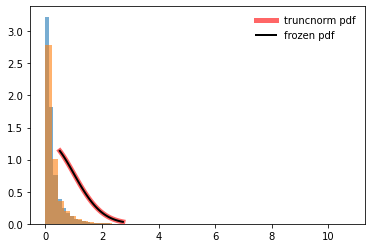

In [51]:
a, b = 0.5, 5
mean, var, skew, kurt = truncnorm.stats(a, b, moments='mvsk')
# Display the probability density function (pdf):

fig, ax = plt.subplots(1, 1)
x = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 100)
ax.plot(x, truncnorm.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='truncnorm pdf')
rv = truncnorm(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = hh_usage[17]
r_control = hh_usage_control[17]

ax.hist(r, density=True, histtype='stepfilled', alpha=0.6, bins=50)
ax.hist(r_control, density=True, histtype='stepfilled', alpha=0.6, bins=50)
ax.legend(loc='best', frameon=False)
plt.show()

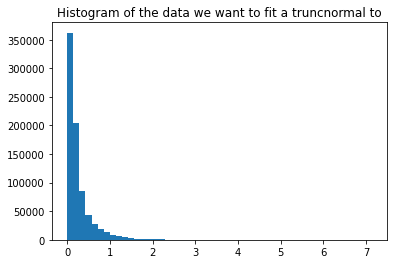

In [87]:
plt.hist(hh_usage[17], bins=50)
plt.title('Histogram of the data we want to fit a truncnormal to - treatment');

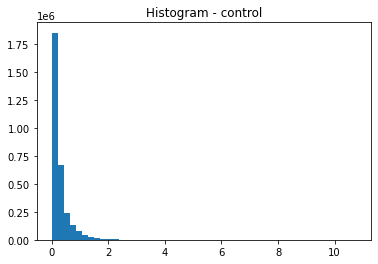

In [89]:
plt.hist(hh_usage_control[17], bins=50)
plt.title('Histogram - control');

In [15]:
# those p values are so small essentially there is no probability of observing these results in absence of the treatment 
# (aka the distributions of the treatment and control are significantly different)

# Our null is that the expected values and variances of the control and treatment are the same. 
# Our alternative is that they are not the same (two sided) so we can say that the treatment 
# significantly impacted consumption

for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(hh_usage[i], hh_usage_control[i])[1])

pvalue for 0 : 0.0
pvalue for 1 : 0.0
pvalue for 2 : 0.0
pvalue for 3 : 0.0
pvalue for 4 : 0.0
pvalue for 5 : 0.0
pvalue for 6 : 0.0
pvalue for 7 : 4.104540102202021e-290
pvalue for 8 : 7.848084587690492e-204
pvalue for 9 : 3.8923861223485153e-261
pvalue for 10 : 0.0
pvalue for 11 : 0.0
pvalue for 12 : 7.058210181436323e-290
pvalue for 13 : 6.398500686392165e-297
pvalue for 14 : 0.0
pvalue for 15 : 1.201856776580421e-292
pvalue for 16 : 1.4889690275520778e-288
pvalue for 17 : 0.0
pvalue for 18 : 0.0
pvalue for 19 : 0.0
pvalue for 20 : 0.0
pvalue for 21 : 0.0
pvalue for 22 : 0.0
pvalue for 23 : 0.0


In [61]:
# for high hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_high[i], control_high[i], equal_var=False)[1])

pvalue for 0 : 2.6381154080534723e-135
pvalue for 1 : 2.5076754634876705e-111
pvalue for 2 : 9.677537574968486e-61
pvalue for 3 : 2.652942087375865e-50
pvalue for 4 : 3.3858175749355807e-46
pvalue for 5 : 4.6133876856908765e-39
pvalue for 6 : 1.6990960786723593e-45
pvalue for 7 : 3.116435062799147e-27
pvalue for 8 : 2.1762021321370974e-51
pvalue for 9 : 3.605171153148194e-71
pvalue for 10 : 1.0631192240678885e-49
pvalue for 11 : 1.137503770323351e-87
pvalue for 12 : 1.8110402531018427e-98
pvalue for 13 : 1.1415113190632159e-110
pvalue for 14 : 4.756438957298891e-55
pvalue for 15 : 2.4108990463534338e-67
pvalue for 16 : 4.7676866304411547e-51
pvalue for 17 : 2.0982600209611048e-80
pvalue for 18 : 3.7259671924975536e-160
pvalue for 19 : 4.178539917514703e-155
pvalue for 20 : 4.4721002321435784e-188
pvalue for 21 : 9.576144264402788e-190
pvalue for 22 : 4.989490176692198e-99
pvalue for 23 : 5.956716354274502e-22


In [60]:
# for normal hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_normal[i], control_normal[i], equal_var=False)[1])

pvalue for 0 : 2.6381154080534723e-135
pvalue for 1 : 2.5076754634876705e-111
pvalue for 2 : 9.677537574968486e-61
pvalue for 3 : 2.652942087375865e-50
pvalue for 4 : 3.3858175749355807e-46
pvalue for 5 : 4.6133876856908765e-39
pvalue for 6 : 1.6990960786723593e-45
pvalue for 7 : 3.116435062799147e-27
pvalue for 8 : 2.1762021321370974e-51
pvalue for 9 : 3.605171153148194e-71
pvalue for 10 : 1.0631192240678885e-49
pvalue for 11 : 1.137503770323351e-87
pvalue for 12 : 1.8110402531018427e-98
pvalue for 13 : 1.1415113190632159e-110
pvalue for 14 : 4.756438957298891e-55
pvalue for 15 : 2.4108990463534338e-67
pvalue for 16 : 4.7676866304411547e-51
pvalue for 17 : 2.0982600209611048e-80
pvalue for 18 : 3.7259671924975536e-160
pvalue for 19 : 4.178539917514703e-155
pvalue for 20 : 4.4721002321435784e-188
pvalue for 21 : 9.576144264402788e-190
pvalue for 22 : 4.989490176692198e-99
pvalue for 23 : 5.956716354274502e-22


In [59]:
# for low hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_low[i], control_low[i], equal_var=False)[1])

pvalue for 0 : 2.6381154080534723e-135
pvalue for 1 : 2.5076754634876705e-111
pvalue for 2 : 9.677537574968486e-61
pvalue for 3 : 2.652942087375865e-50
pvalue for 4 : 3.3858175749355807e-46
pvalue for 5 : 4.6133876856908765e-39
pvalue for 6 : 1.6990960786723593e-45
pvalue for 7 : 3.116435062799147e-27
pvalue for 8 : 2.1762021321370974e-51
pvalue for 9 : 3.605171153148194e-71
pvalue for 10 : 1.0631192240678885e-49
pvalue for 11 : 1.137503770323351e-87
pvalue for 12 : 1.8110402531018427e-98
pvalue for 13 : 1.1415113190632159e-110
pvalue for 14 : 4.756438957298891e-55
pvalue for 15 : 2.4108990463534338e-67
pvalue for 16 : 4.7676866304411547e-51
pvalue for 17 : 2.0982600209611048e-80
pvalue for 18 : 3.7259671924975536e-160
pvalue for 19 : 4.178539917514703e-155
pvalue for 20 : 4.4721002321435784e-188
pvalue for 21 : 9.576144264402788e-190
pvalue for 22 : 4.989490176692198e-99
pvalue for 23 : 5.956716354274502e-22


In [12]:
# for affluent, high hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_high_affluent[i], control_high_affluent[i], equal_var=False)[1])=

SyntaxError: invalid syntax (<ipython-input-12-67adc1a5780a>, line 3)

In [ ]:
# for affluent, normal hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_normal_affluent[i], control_normal_affluent[i], equal_var=False)[1])

In [ ]:
# for affluent, low hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_low_affluent[i], control_low_affluent[i], equal_var=False)[1])

In [ ]:
# for adversity, high hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_high_adversity[i], control_high_adversity[i], equal_var=False)[1])

In [ ]:
# for adversity, normal hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_normal_adversity[i], control_normal_adversity[i], equal_var=False)[1])

In [ ]:
# for adversity, low hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_low_adversity[i], control_low_adversity[i], equal_var=False)[1])

In [ ]:
# for comfortable, high hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_high_comfortable[i], control_high_comfortable[i], equal_var=False)[1])

In [ ]:
# for comfortable, normal hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_normal_comfortable[i], control_normal_comfortable[i], equal_var=False)[1])

In [ ]:
# for comfortable, low hours only
for i in range(24):
    print('pvalue for', i, ':', stats.ttest_ind(treatment_low_comfortable[i], control_low_comfortable[i], equal_var=False)[1])

In [68]:
truncnorm(*truncnorm.fit(hh_usage[17]))

In [90]:
truncnorm(*truncnorm.fit(hh_usage_control[17]))

In [84]:
truncnorm.mean(*truncnorm.fit(hh_usage[17]))
# what is the prob of observing this mean under control distribution

0.26461707384385563

In [91]:
truncnorm.mean(*truncnorm.fit(hh_usage_control[17]))

0.2819129261372696

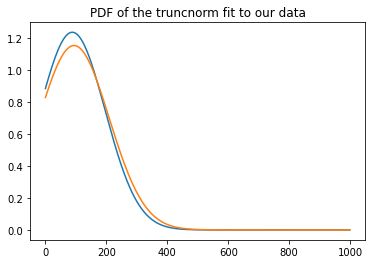

In [99]:
plt.plot(_68.pdf(np.linspace(0, 3, 1000)))
plt.plot(_90.pdf(np.linspace(0, 3, 1000)))
plt.title('PDF of the truncnorm fit to our data')
plt.show()

In [92]:
from scipy import stats

In [96]:
# stats.ttest_ind(0.26461707384385563, 0.2819129261372696)
# Calculate the T-test for the means of two independent samples of scores.
stats.ttest_ind(_68.pdf(np.linspace(0, 3, 1000)), _90.pdf(np.linspace(0, 3, 1000)))

Ttest_indResult(statistic=0.02748057548640627, pvalue=0.9780791769106822)

In [100]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(_68.pdf(np.linspace(0, 3, 1000)), _90.pdf(np.linspace(0, 3, 1000)))

Ttest_relResult(statistic=0.45275397496964886, pvalue=0.6508242150596923)

In [67]:
truncnorm.fit(hh_usage_control[17])

(-545.5836799195404,
 321.0066438284713,
 0.2819129261372696,
 0.34653658615248095)

In [19]:
vals = truncnorm.ppf([0.001, 0.5, 0.999], a, b)
np.allclose([0.001, 0.5, 0.999], truncnorm.cdf(vals, a, b))

True

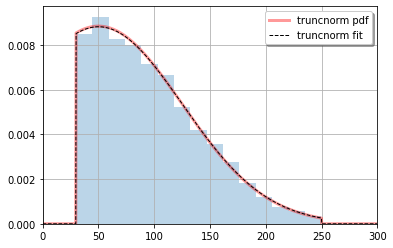

In [53]:
import numpy as np
from scipy.stats import truncnorm
from scipy.optimize import fmin_slsqp

import matplotlib.pyplot as plt


def func(p, r, xa, xb):
    return truncnorm.nnlf(p, r)


def constraint(p, r, xa, xb):
    a, b, loc, scale = p
    return np.array([a*scale + loc - xa, b*scale + loc - xb])


xa, xb = 30, 250 
loc = 50
scale = 75

a = (xa - loc)/scale
b = (xb - loc)/scale

# Generate some data to work with.
r = truncnorm.rvs(a, b, loc=loc, scale=scale, size=10000)

loc_guess = 30
scale_guess = 90
a_guess = (xa - loc_guess)/scale_guess
b_guess = (xb - loc_guess)/scale_guess
p0 = [a_guess, b_guess, loc_guess, scale_guess]

par = fmin_slsqp(func, p0, f_eqcons=constraint, args=(r, xa, xb),
                 iprint=False, iter=1000)

xmin = 0
xmax = 300
x = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, truncnorm.pdf(x, a, b, loc=loc, scale=scale),
        'r-', lw=3, alpha=0.4, label='truncnorm pdf')
ax.plot(x, truncnorm.pdf(x, *par),
        'k--', lw=1, alpha=1.0, label='truncnorm fit')
ax.hist(r, bins=15, density=True, histtype='stepfilled', alpha=0.3)
ax.legend(shadow=True)
plt.xlim(xmin, xmax)
plt.grid(True)

plt.show()

In [58]:
truncnorm.rvs(a, b, loc=loc, scale=scale, size=10000)

array([ 82.04601062, 145.84955221, 121.14026076, ..., 247.74707047,
       153.20974703,  35.77225712])

In [65]:
hh_usage[17] < 0.01

0         False
1         False
2         False
3         False
4         False
          ...  
786649    False
786650    False
786651    False
786652    False
786653    False
Name: KWH/hh, Length: 786654, dtype: bool

(array([2.79010192e+00, 1.00454780e+00, 3.55198384e-01, 1.95864067e-01,
        1.19497354e-01, 7.10712601e-02, 4.10581810e-02, 2.55011911e-02,
        1.56442197e-02, 9.76372567e-03, 6.20083810e-03, 4.03964374e-03,
        2.52816125e-03, 1.65887083e-03, 1.07382935e-03, 7.26413971e-04,
        5.56466189e-04, 4.01558034e-04, 2.82744982e-04, 1.89499297e-04,
        1.45884379e-04, 1.18813051e-04, 9.17417230e-05, 3.91030295e-05,
        4.06069922e-05, 1.20317014e-05, 4.51188802e-06, 9.02377604e-06,
        6.01585069e-06, 7.51981336e-06, 4.51188802e-06, 0.00000000e+00,
        3.00792535e-06, 3.00792535e-06, 1.50396267e-06, 1.50396267e-06,
        0.00000000e+00, 4.51188802e-06, 1.50396267e-06, 0.00000000e+00,
        1.50396267e-06, 0.00000000e+00, 1.50396267e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00792535e-06, 1.50396267e-06]),
 array([ 0.        ,  0.21521999,  0.43043999,  0.64565998,  0.86087998,
         1.07609997, 

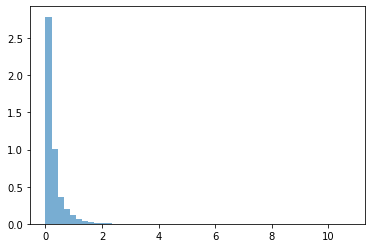

In [55]:
plt.hist(r_control, density=True, histtype='stepfilled', alpha=0.6, bins=50)